In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import openpyxl

In [6]:
pd.options.mode.chained_assignment = None 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:
df = pd.read_excel("globalterrorismdb_0221dist.xlsx")

In [8]:
df.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            189429
extended                   0
resolution            196515
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                  0
city                     427
latitude                4627
longitude               4628
specificity                1
vicinity                   0
location              137414
summary                66121
crit1                      0
crit2                      0
crit3                      0
doubtterr                  0
alternative           168064
alternative_txt       168064
multiple                   0
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           193485
attacktype2_txt       193485
attacktype3           200613
attacktype3_txt       200613
targtype1     

In [9]:
df = df[['iyear','imonth','iday','country_txt','country','region_txt',
         'region','provstate','city',
         'latitude', 'longitude','suicide', 'attacktype1_txt',
         'attacktype1', 'targtype1_txt', 'targtype1',
         'gname', 'weaptype1_txt','weaptype1',
         'nkill','nwound','success','eventid','natlty1',"natlty1_txt","extended","specificity","vicinity","crit1"]]

In [10]:
df.isnull().sum()

iyear                  0
imonth                 0
iday                   0
country_txt            0
country                0
region_txt             0
region                 0
provstate              0
city                 427
latitude            4627
longitude           4628
suicide                0
attacktype1_txt        0
attacktype1            0
targtype1_txt          0
targtype1              0
gname                  0
weaptype1_txt          0
weaptype1              0
nkill              11950
nwound             18924
success                0
eventid                0
natlty1             1850
natlty1_txt         1850
extended               0
specificity            1
vicinity               0
crit1                  0
dtype: int64

In [11]:
df.head()

iyear  imonth  iday         country_txt  country                   region_txt  region provstate           city   latitude   longitude  suicide                 attacktype1_txt  attacktype1                targtype1_txt  targtype1                               gname weaptype1_txt  weaptype1  nkill  nwound  success       eventid  natlty1         natlty1_txt  extended  specificity  vicinity  crit1
0   1970       7     2  Dominican Republic       58  Central America & Caribbean       2  National  Santo Domingo  18.456792  -69.951164        0                   Assassination            1  Private Citizens & Property         14                              MANO-D       Unknown         13    1.0     0.0        1  197000000001     58.0  Dominican Republic         0          1.0         0      1
1   1970       0     0              Mexico      130                North America       1   Federal    Mexico city  19.371887  -99.086624        0     Hostage Taking (Kidnapping)            6      Government (Diplomatic)          7  23rd of September Communist League       Unknown         13    0.0     0.0        1  197000000002     21.0             Belgium         0          1.0         0      1
2   1970       1     0         Philippines      160               Southeast Asia       5    Tarlac        Unknown  15.478598  120.599741        0                   Assassination            1          Journalists & Media         10                             Unknown       Unknown         13    1.0     0.0        1  197001000001    217.0       United States         0          4.0         0      1
3   1970       1     0              Greece       78               Western Europe       8    Attica         Athens  37.997490   23.762728        0               Bombing/Explosion            3      Government (Diplomatic)          7                             Unknown    Explosives          6    NaN     NaN        1  197001000002    217.0       United States         0          1.0         0      1
4   1970       1     0               Japan      101                    East Asia       4   Fukouka        Fukouka  33.580412  130.396361        0  Facility/Infrastructure Attack            7      Government (Diplomatic)          7                             Unknown    Incendiary          8    NaN     NaN        1  197001000003    217.0       United States         0          1.0         0      1

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201183 entries, 0 to 201182
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            201183 non-null  int64  
 1   imonth           201183 non-null  int64  
 2   iday             201183 non-null  int64  
 3   country_txt      201183 non-null  object 
 4   country          201183 non-null  int64  
 5   region_txt       201183 non-null  object 
 6   region           201183 non-null  int64  
 7   provstate        201183 non-null  object 
 8   city             200756 non-null  object 
 9   latitude         196556 non-null  float64
 10  longitude        196555 non-null  float64
 11  suicide          201183 non-null  int64  
 12  attacktype1_txt  201183 non-null  object 
 13  attacktype1      201183 non-null  int64  
 14  targtype1_txt    201183 non-null  object 
 15  targtype1        201183 non-null  int64  
 16  gname            201183 non-null  obje

In [13]:
## We will proceed managing the missing data in column iday, using replace by a random number
df['iday'].value_counts()
df['iday'].replace(to_replace=0, value=np.random.randint(1, 29), inplace=True)
df['iday'].value_counts()

C:\Users\dev17\AppData\Local\Temp\ipykernel_32552\2959806221.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





iday
11    7528
15    7168
1     6972
4     6816
16    6735
9     6734
10    6727
28    6705
12    6693
14    6674
13    6667
7     6666
3     6617
20    6616
27    6591
19    6580
2     6568
25    6563
5     6544
17    6512
18    6502
8     6471
21    6439
22    6422
26    6404
23    6391
6     6366
24    6365
29    6059
30    5648
31    3440
Name: count, dtype: int64

In [15]:
## We will proceed managing the missing data in column imonth, using replace by a random number
df['imonth'].value_counts()
df['imonth'].replace(to_replace=0, value=np.random.randint(1, 13), inplace=True)
df['imonth'].value_counts()

C:\Users\dev17\AppData\Local\Temp\ipykernel_32552\1483221912.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





imonth
5     18898
7     18038
8     17293
10    17167
6     17070
3     16906
4     16836
1     16674
11    16257
9     15681
2     15425
12    14938
Name: count, dtype: int64

In [16]:
## We will create a new column called idate
df2 = df[["iyear", "imonth", "iday"]].copy()
df2.columns = ["year", "month", "day"]
pd.to_datetime(df2)
df["idate"] = pd.to_datetime(df2)
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]
df

idate  iyear  imonth  iday         country_txt  country                   region_txt  region          provstate           city   latitude   longitude  suicide                 attacktype1_txt  attacktype1                targtype1_txt  targtype1                               gname weaptype1_txt  weaptype1  nkill  nwound  success       eventid  natlty1         natlty1_txt  extended  specificity  vicinity  crit1
0      1970-07-02   1970       7     2  Dominican Republic       58  Central America & Caribbean       2           National  Santo Domingo  18.456792  -69.951164        0                   Assassination            1  Private Citizens & Property         14                              MANO-D       Unknown         13    1.0     0.0        1  197000000001     58.0  Dominican Republic         0          1.0         0      1
1      1970-01-11   1970       1    11              Mexico      130                North America       1            Federal    Mexico city  19.371887  -99.086624        0     Hostage Taking (Kidnapping)            6      Government (Diplomatic)          7  23rd of September Communist League       Unknown         13    0.0     0.0        1  197000000002     21.0             Belgium         0          1.0         0      1
2      1970-01-11   1970       1    11         Philippines      160               Southeast Asia       5             Tarlac        Unknown  15.478598  120.599741        0                   Assassination            1          Journalists & Media         10                             Unknown       Unknown         13    1.0     0.0        1  197001000001    217.0       United States         0          4.0         0      1
3      1970-01-11   1970       1    11              Greece       78               Western Europe       8             Attica         Athens  37.997490   23.762728        0               Bombing/Explosion            3      Government (Diplomatic)          7                             Unknown    Explosives          6    NaN     NaN        1  197001000002    217.0       United States         0          1.0         0      1
4      1970-01-11   1970       1    11               Japan      101                    East Asia       4            Fukouka        Fukouka  33.580412  130.396361        0  Facility/Infrastructure Attack            7      Government (Diplomatic)          7                             Unknown    Incendiary          8    NaN     NaN        1  197001000003    217.0       United States         0          1.0         0      1
...           ...    ...     ...   ...                 ...      ...                          ...     ...                ...            ...        ...         ...      ...                             ...          ...                          ...        ...                                 ...           ...        ...    ...     ...      ...           ...      ...                 ...       ...          ...       ...    ...
201178 2019-12-31   2019      12    31                Iraq       95   Middle East & North Africa      10            Baghdad        Baghdad  33.303567   44.371771        0               Bombing/Explosion            3  Private Citizens & Property         14                             Unknown    Explosives          6    0.0     0.0        1  201912310028     95.0                Iraq         0          1.0         0      1
201179 2019-12-31   2019      12    31               Sudan      195           Sub-Saharan Africa      11        West Darfur     El Geneina  13.440886   22.441728        0                         Unknown            9                       Police          3                             Unknown       Unknown         13    2.0     1.0        1  201912310030    195.0               Sudan         0          1.0         0      1
201180 2019-12-31   2019      12    31               Sudan      195           Sub-Saharan Africa      11        West Darfur     El Geneina  13.440886   22.441728        0                   Armed A

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201183 entries, 0 to 201182
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   idate            201183 non-null  datetime64[ns]
 1   iyear            201183 non-null  int64         
 2   imonth           201183 non-null  int64         
 3   iday             201183 non-null  int64         
 4   country_txt      201183 non-null  object        
 5   country          201183 non-null  int64         
 6   region_txt       201183 non-null  object        
 7   region           201183 non-null  int64         
 8   provstate        201183 non-null  object        
 9   city             200756 non-null  object        
 10  latitude         196556 non-null  float64       
 11  longitude        196555 non-null  float64       
 12  suicide          201183 non-null  int64         
 13  attacktype1_txt  201183 non-null  object        
 14  attacktype1      201

In [19]:
## As we see there are missing values in columns nkill nwound, as the amount of
## missing values are more than 8%, we could not proceed removing those rows with mising values in both columns 
## so we will substitute those values with a average value so we will not affect to our training data

df = df.fillna({'nkill': df['nkill'].mean(), 'nwound': df['nwound'].mean()})

In [20]:
df["nkill"] = df["nkill"].astype(int)
df["nwound"] = df["nwound"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201183 entries, 0 to 201182
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   idate            201183 non-null  datetime64[ns]
 1   iyear            201183 non-null  int64         
 2   imonth           201183 non-null  int64         
 3   iday             201183 non-null  int64         
 4   country_txt      201183 non-null  object        
 5   country          201183 non-null  int64         
 6   region_txt       201183 non-null  object        
 7   region           201183 non-null  int64         
 8   provstate        201183 non-null  object        
 9   city             200756 non-null  object        
 10  latitude         196556 non-null  float64       
 11  longitude        196555 non-null  float64       
 12  suicide          201183 non-null  int64         
 13  attacktype1_txt  201183 non-null  object        
 14  attacktype1      201

In [21]:
df.to_csv("Terrorism_preprocessed1.csv",index=False)

In [22]:
# There are 4,627 rows (2.18% of the dataset) with missing latitude and longitude values.
# We'll remove these rows from the dataset.
df = df.dropna(subset=['longitude'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196555 entries, 0 to 201182
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   idate            196555 non-null  datetime64[ns]
 1   iyear            196555 non-null  int64         
 2   imonth           196555 non-null  int64         
 3   iday             196555 non-null  int64         
 4   country_txt      196555 non-null  object        
 5   country          196555 non-null  int64         
 6   region_txt       196555 non-null  object        
 7   region           196555 non-null  int64         
 8   provstate        196555 non-null  object        
 9   city             196135 non-null  object        
 10  latitude         196555 non-null  float64       
 11  longitude        196555 non-null  float64       
 12  suicide          196555 non-null  int64         
 13  attacktype1_txt  196555 non-null  object        
 14  attacktype1      196555 n

In [23]:
df2 = df[df["provstate"].isnull()]
df2[df2["city"].isnull()]

Empty DataFrame
Columns: [idate, iyear, imonth, iday, country_txt, country, region_txt, region, provstate, city, latitude, longitude, suicide, attacktype1_txt, attacktype1, targtype1_txt, targtype1, gname, weaptype1_txt, weaptype1, nkill, nwound, success, eventid, natlty1, natlty1_txt, extended, specificity, vicinity, crit1]
Index: []

In [24]:
df3 = df[df["city"].isnull()]
df3[df3["provstate"].isnull()]

Empty DataFrame
Columns: [idate, iyear, imonth, iday, country_txt, country, region_txt, region, provstate, city, latitude, longitude, suicide, attacktype1_txt, attacktype1, targtype1_txt, targtype1, gname, weaptype1_txt, weaptype1, nkill, nwound, success, eventid, natlty1, natlty1_txt, extended, specificity, vicinity, crit1]
Index: []

In [25]:
##this means: when the city is non value the provstate has value and the contrary also happens, so no cleaning is need it
df.to_csv("Terrorism_clean_dataset1.csv",index=False)

<Axes: >

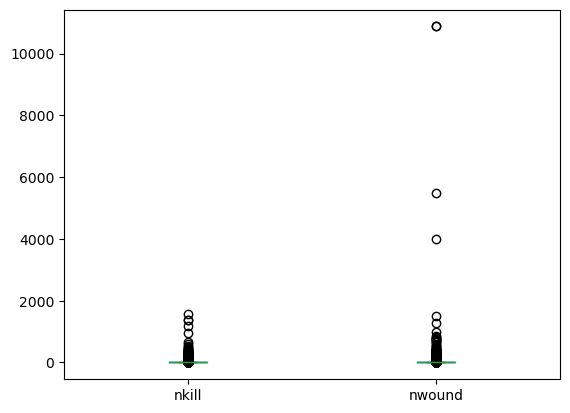

In [26]:
df[['nkill', 'nwound']].plot.box()#visualizing outliers

In [27]:
# Looking for outliers
df[['nkill', 'nwound']].describe()

nkill         nwound
count  196555.000000  196555.000000
mean        2.352156       3.136674
std        10.857536      40.164057
min         0.000000       0.000000
25%         0.000000       0.000000
50%         1.000000       0.000000
75%         2.000000       3.000000
max      1570.000000   10878.000000

Text(0, 0.5, 'Number of Attacks')

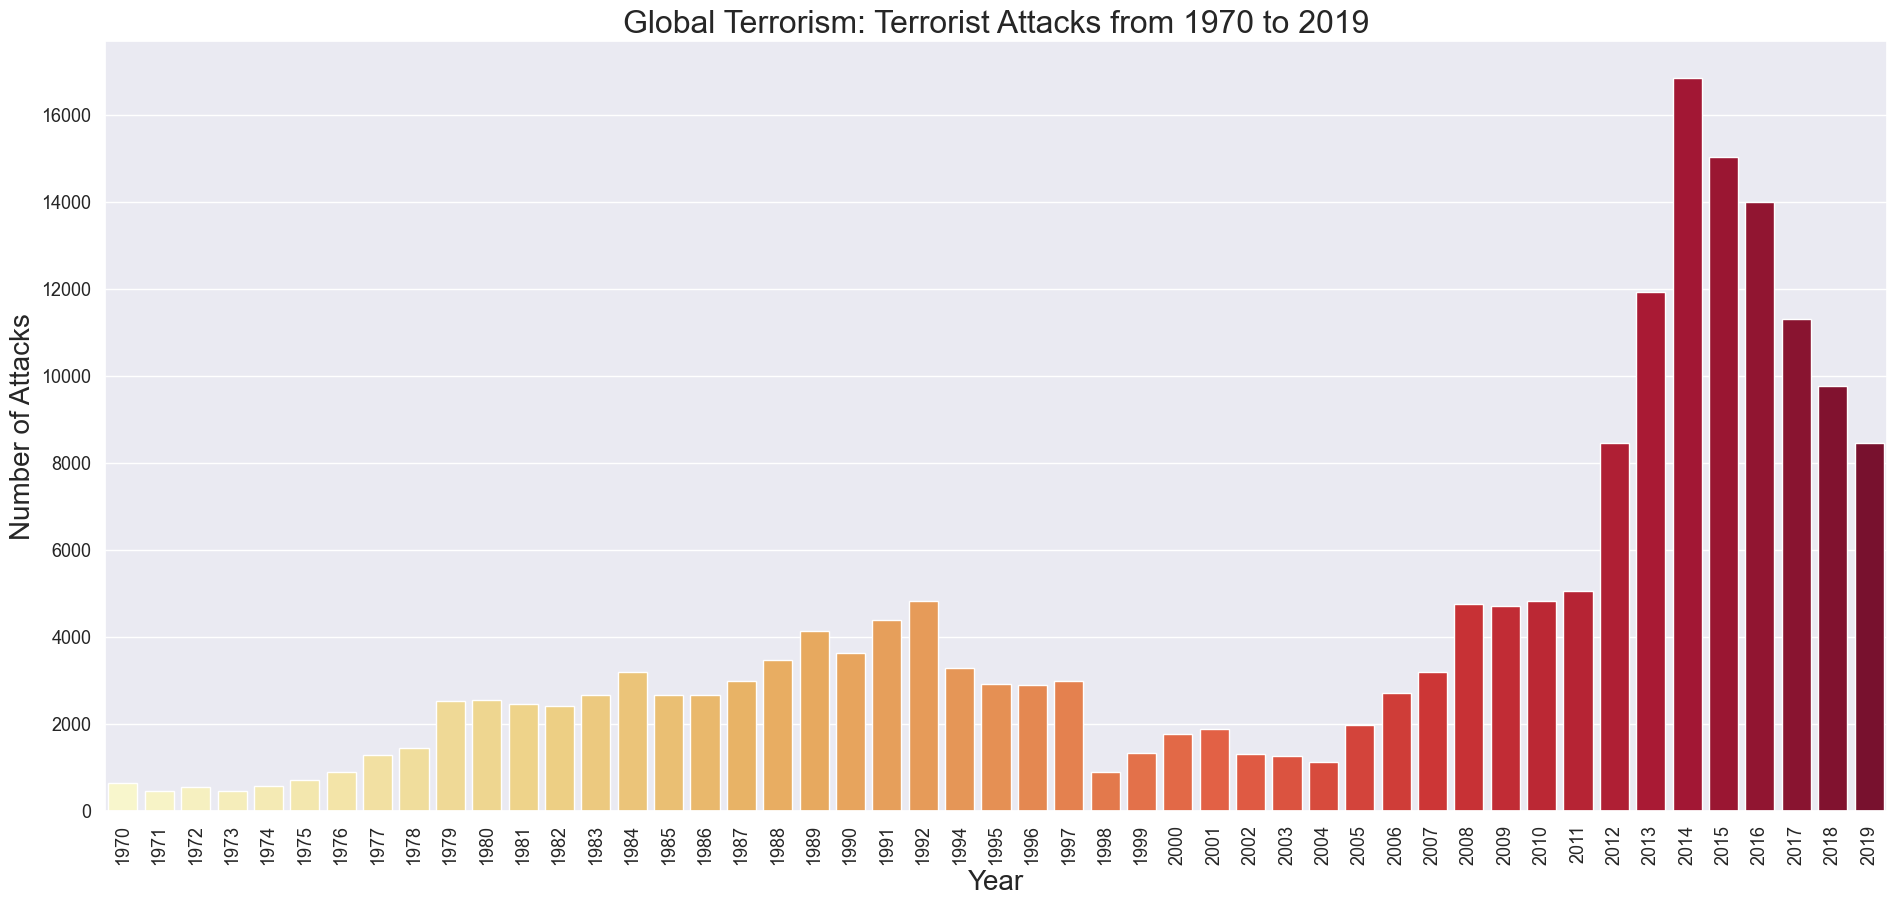

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("YlOrRd", n_colors=len(df['iyear'].unique()))

# Plotting the number of terrorist attacks per year with the new discrete palette
sns.set_theme(style="darkgrid")
plt.figure(figsize=(23, 10))
sns.countplot(x='iyear', hue='iyear', data=df, palette=palette, legend=False)
plt.title('Global Terrorism: Terrorist Attacks from 1970 to 2019', fontsize=23)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Year', fontsize=20) 
plt.ylabel('Number of Attacks', fontsize=20)


In [34]:
# Group data by year to calculate total and average values for people killed and wounded
df_total_killed_year = df.groupby('iyear').agg(
    Total_killed=('nkill', 'sum'),
    Total_attacks=('nkill', 'count'),
    Mean_killed=('nkill', 'mean'),
    Total_wound=('nwound', 'sum'),
    Mean_wound=('nwound', 'mean')
).reset_index()

df_total_killed_year


iyear  Total_killed  Total_attacks  Mean_killed  Total_wound  Mean_wound
0    1970           218            643     0.339036          365    0.567652
1    1971           296            463     0.639309          511    1.103672
2    1972           626            551     1.136116         1387    2.517241
3    1973           462            465     0.993548         1176    2.529032
4    1974           649            577     1.124783         1543    2.674177
5    1975           911            727     1.253095         1619    2.226960
6    1976           849            900     0.943333         1593    1.770000
7    1977           688           1292     0.532508         1145    0.886223
8    1978          1666           1455     1.145017         2103    1.445361
9    1979          2575           2533     1.016581         3547    1.400316
10   1980          5021           2560     1.961328         4947    1.932422
11   1981          5769           2469     2.336574         5152    2.086675
12   1982          6392           2407     2.655588         5694    2.365600
13   1983          9557           2670     3.579401         6650    2.490637
14   1984          9822           3198     3.071295         6921    2.164165
15   1985          6675           2679     2.491601         5894    2.200075
16   1986          5232           2680     1.952239         6502    2.426119
17   1987          6206           2989     2.076280         5940    1.987287
18   1988          6298           3470     1.814986         6703    1.931700
19   1989          7588           4147     1.829756         5366    1.293947
20   1990          6370           3647     1.746641         5620    1.540993
21   1991          7895           4405     1.792281         7385    1.676504
22   1992          8558           4832     1.771109         9683    2.003932
23   1994          7233           3295     2.195144         7596    2.305311
24   1995          5700           2920     1.952055        13849    4.742808
25   1996          6135           2909     2.108972        10472    3.599862
26   1997          9971           2997     3.326994         9132    3.047047
27   1998          4206            891     4.720539         8509    9.549944
28   1999          3350           1342     2.496274         5553    4.137854
29   2000          4412           1781     2.477260         6231    3.498596
30   2001          7422           1889     3.929063        28270   14.965590
31   2002          4697           1308     3.590979         7299    5.580275
32   2003          3334           1263     2.639747         7610    6.025337
33   2004          5660           1135     4.986784        12290   10.828194
34   2005          6296           1985     3.171788        13191    6.645340
35   2006          9268           2715     3.413628        15959    5.878085
36   2007         12772           3204     3.986267        23191    7.238140
37   2008          9190           4753     1.933516        19448    4.091732
38   2009          9289           4707     1.973444        19422    4.126195
39   2010          7819           4819     1.622536        16026    3.325586
40   2011          8272           5051     1.637696        14937    2.957236
41   2012         15866           8469     1.873421        26417    3.119258
42   2013         22852          11933     1.915026        39333    3.296154
43   2014         46366          16848     2.752018        46578    2.764601
44   2015         40494          15026     2.694929        48673    3.239252
45   2016         36882          14000     2.634429        44227    3.159071
46   2017         28138          11307     2.488547        28550    2.524985
47   2018         24757           9781     2.531132        24434    2.498109
48   2019         21624           8468     2.553614        21886    2.584554

Text(0, 0.5, 'Total People Killed')

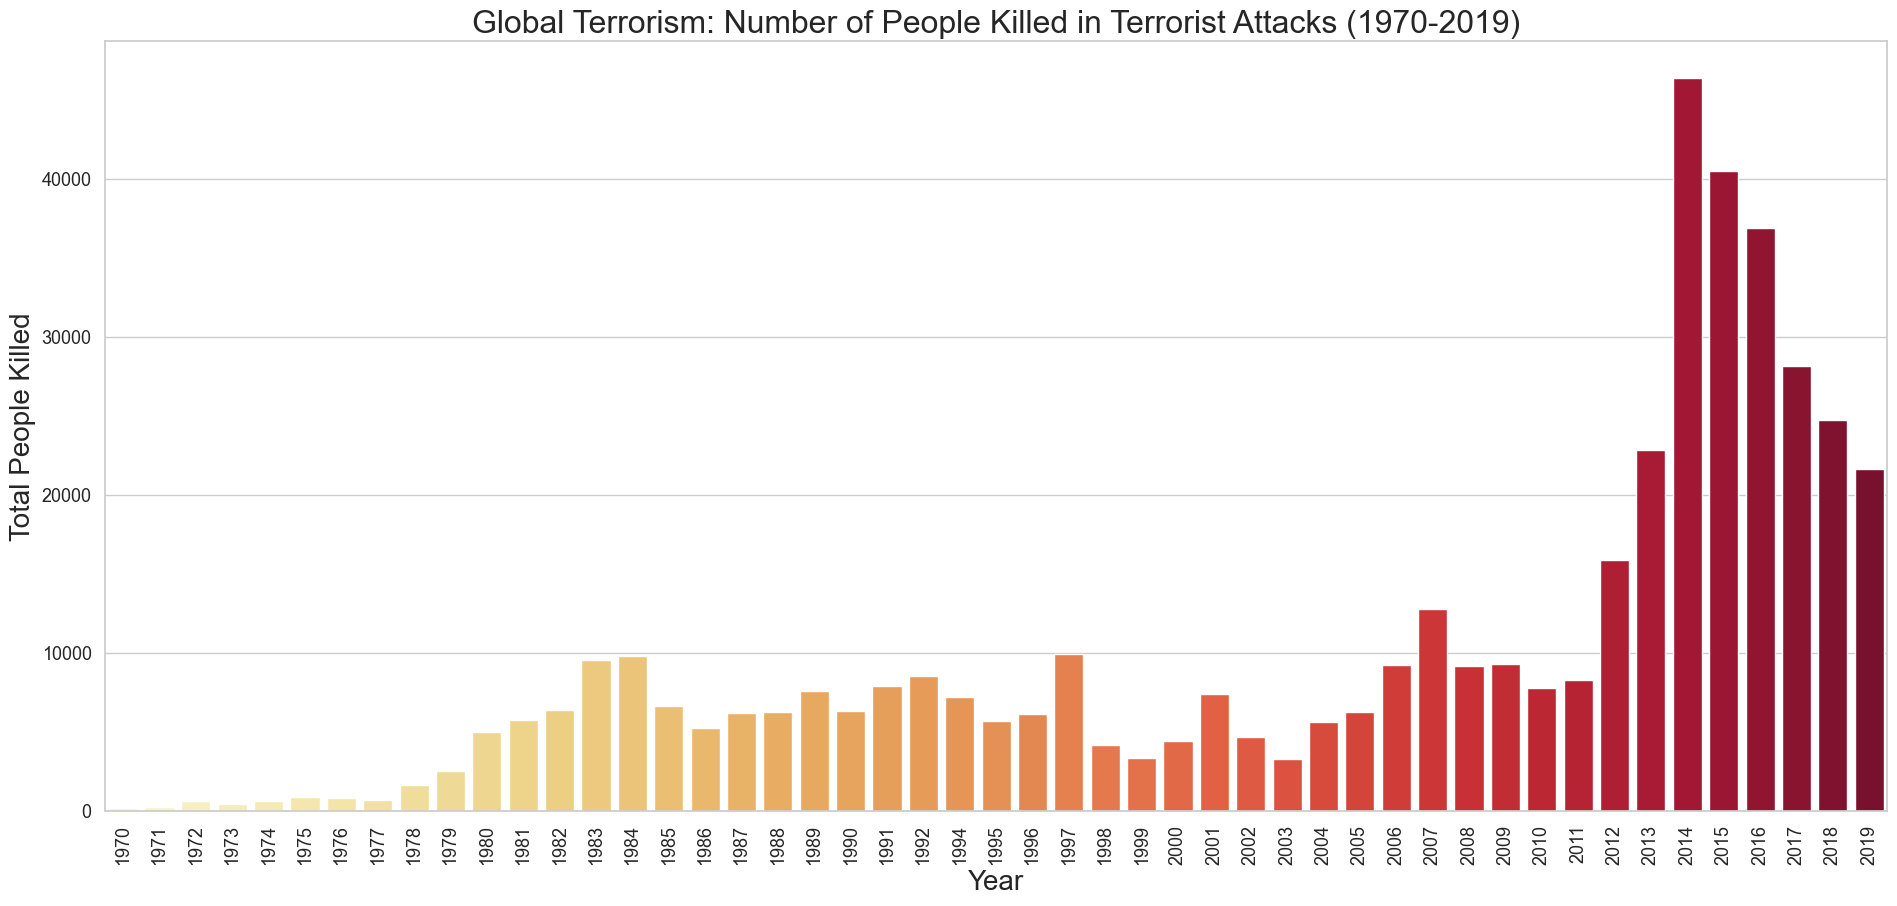

In [39]:
# Plotting the total number of people killed in terrorist attacks per year from 1970 to 2019
sns.set_theme(style="whitegrid")  # Set the theme once
plt.figure(figsize=(23, 10))
palette = sns.color_palette("YlOrRd", n_colors=len(df['iyear'].unique()))
ax = sns.barplot(x="iyear", y="Total_killed",hue='iyear', palette=palette, data=df_total_killed_year, legend=False)

plt.title('Global Terrorism: Number of People Killed in Terrorist Attacks (1970-2019)', fontsize=23)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total People Killed', fontsize=20)


Text(0, 0.5, 'Total People Wounded')

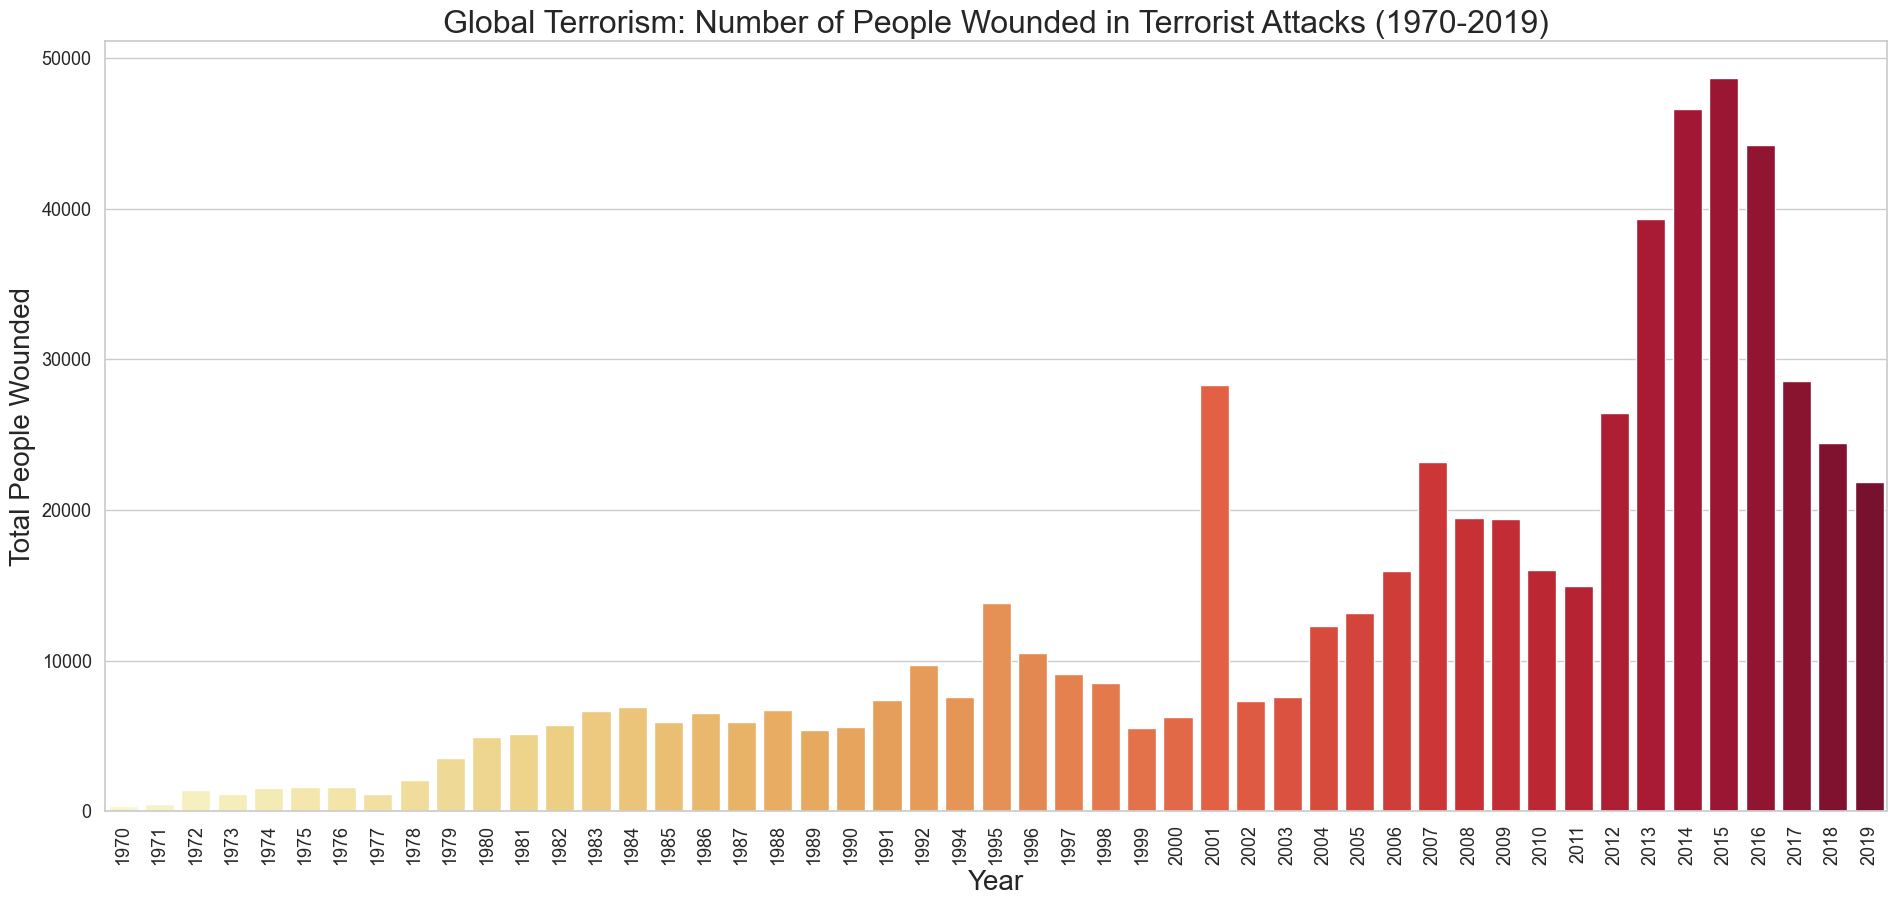

In [40]:
# Plotting the total number of people wounded in terrorist attacks per year from 1970 to 2019
sns.set_theme(style="whitegrid")  # Set theme once at the start
plt.figure(figsize=(23, 10))
palette = sns.color_palette("YlOrRd", n_colors=len(df['iyear'].unique()))
ax2 = sns.barplot(x="iyear", y="Total_wound",hue='iyear',palette=palette,legend=False, data=df_total_killed_year)

plt.title('Global Terrorism: Number of People Wounded in Terrorist Attacks (1970-2019)', fontsize=23)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total People Wounded', fontsize=20)


Text(0, 0.5, 'Total People Killed')

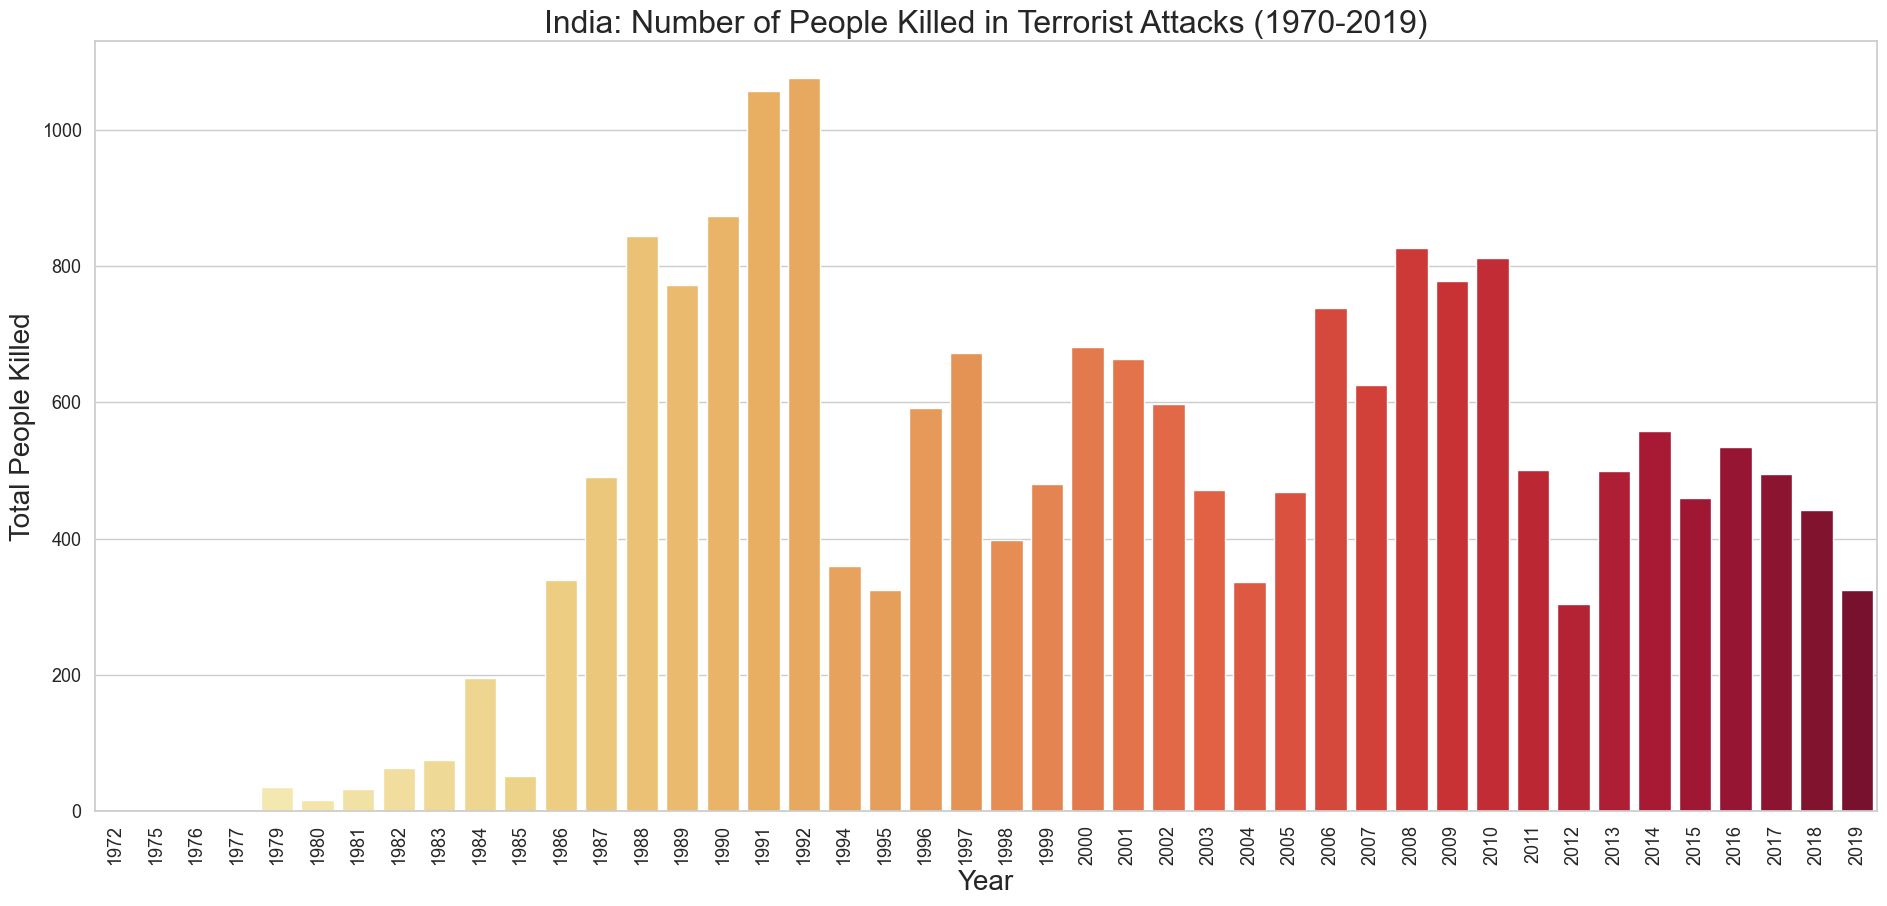

In [44]:
# Filter data for attacks in India
df_india = df[df['country_txt'] == 'India']

# Group by year to get total kills and related statistics specifically for India
df_total_killed_year_india = df_india.groupby('iyear').agg(
    Total_killed=('nkill', 'sum'),
    Total_attacks=('nkill', 'count'),
    Mean_killed=('nkill', 'mean')
).reset_index()

# Plot the data for India
sns.set_theme(style="whitegrid")
plt.figure(figsize=(23, 10))

palette = sns.color_palette("YlOrRd", n_colors=len(df_total_killed_year_india['iyear'].unique()))
ax = sns.barplot(x="iyear", y="Total_killed", hue="iyear", palette=palette, data=df_total_killed_year_india, legend=False)

plt.title('India: Number of People Killed in Terrorist Attacks (1970-2019)', fontsize=23)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total People Killed', fontsize=20)


Text(0, 0.5, 'Total People Wounded')

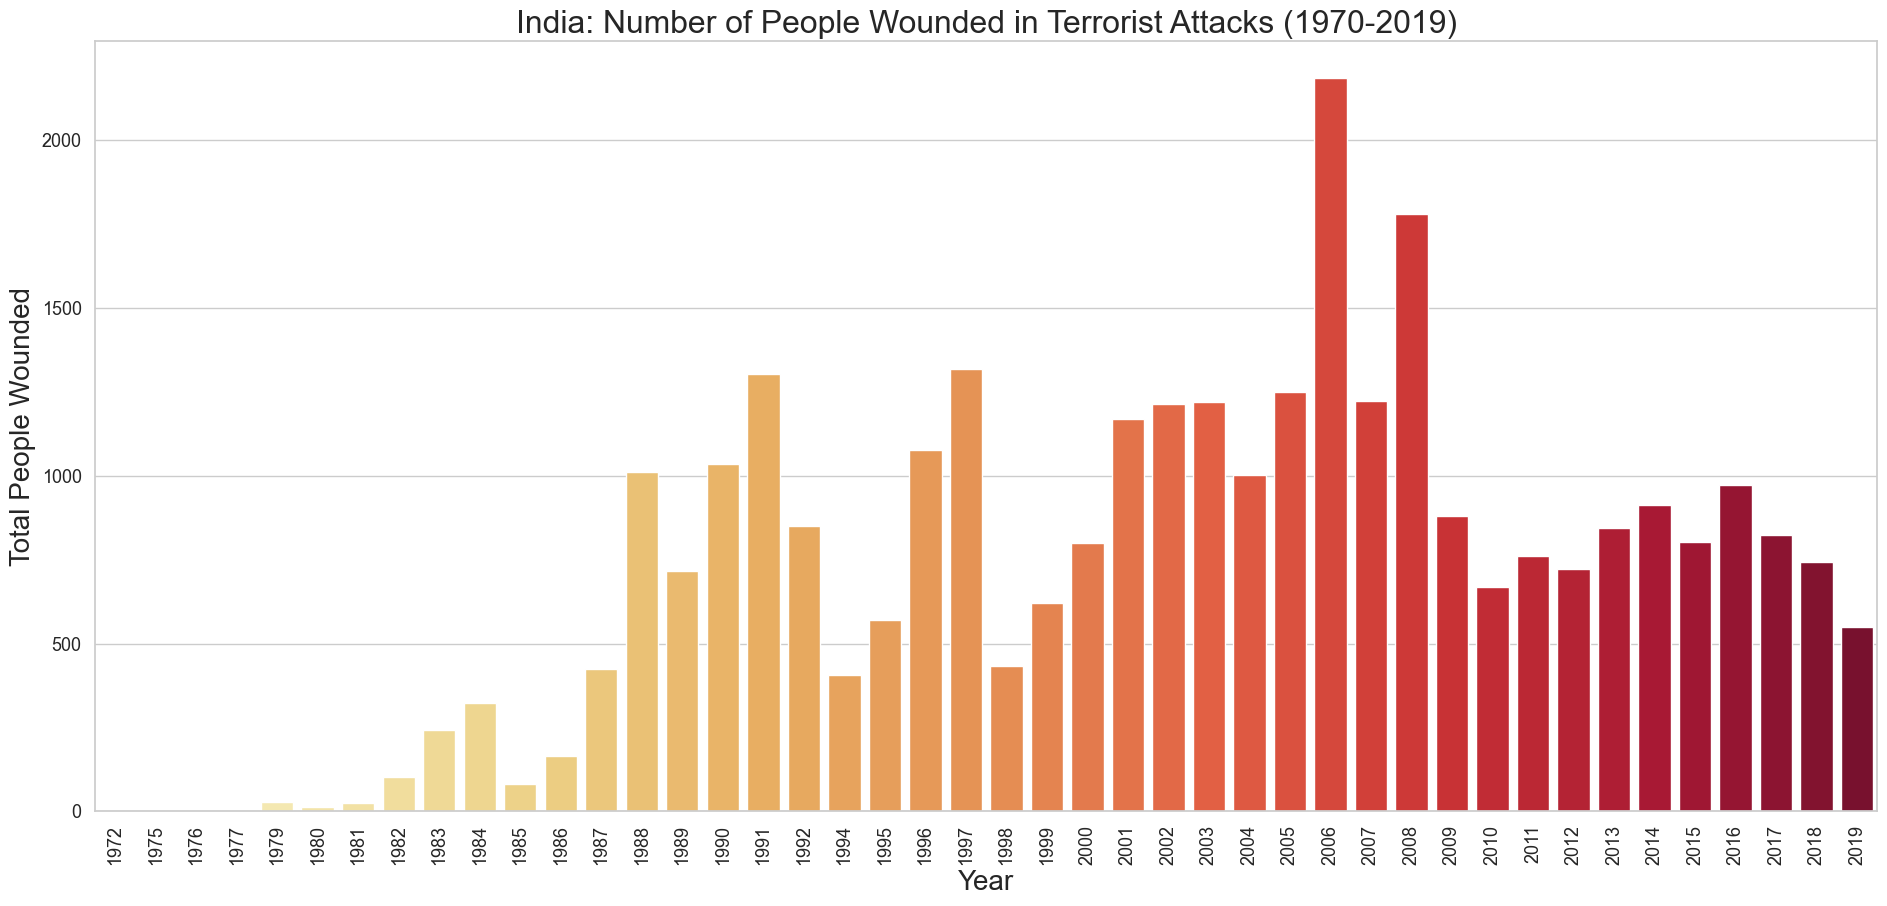

In [45]:
# Filter data for attacks in India
df_india = df[df['country_txt'] == 'India']

# Group by year to get total wounds and related statistics specifically for India
df_total_wound_year_india = df_india.groupby('iyear').agg(
    Total_wound=('nwound', 'sum'),
    Total_attacks=('nwound', 'count'),
    Mean_wound=('nwound', 'mean')
).reset_index()

# Plot the data for India
sns.set_theme(style="whitegrid")  # Set theme once at the start
plt.figure(figsize=(23, 10))

palette = sns.color_palette("YlOrRd", n_colors=len(df_total_wound_year_india['iyear'].unique()))
ax2 = sns.barplot(x="iyear", y="Total_wound", hue="iyear", palette=palette, legend=False, data=df_total_wound_year_india)

plt.title('India: Number of People Wounded in Terrorist Attacks (1970-2019)', fontsize=23)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total People Wounded', fontsize=20)


In [41]:
#We can see that the number of terrorist attacks have increased since 2014, and also de total amount of people killed.
#The worst year was 2014, with 16794 terrorist attack and 46308 pepople killed. 
#With regard to people wounded we see an outlier in 2001, due to the terrorst attack in US (11th September). 
#The trend shows that 2009 to 2019 has been the worst decade of the period analysed.
#Now we will analyse the trends by region, to see if the global terrorism is impacting in a different way in each region, or is a common problem.

In [42]:
df_total_killed_year_by_region = df.groupby(['iyear','region_txt']).agg(Total_killed=('nkill', 'sum'), Total_attacks=('nkill', 'count'), Mean_killed= ('nkill','mean'),Total_wound=('nwound', 'sum'), Mean_wound= ('nwound','mean')).reset_index()
df_total_killed_year_by_region

iyear                   region_txt  Total_killed  Total_attacks  Mean_killed  Total_wound  Mean_wound
0     1970        Australasia & Oceania             0              1     0.000000            0    0.000000
1     1970  Central America & Caribbean             3              6     0.500000            0    0.000000
2     1970                    East Asia             2              2     1.000000            3    1.500000
3     1970               Eastern Europe            18             12     1.500000           27    2.250000
4     1970   Middle East & North Africa            15             28     0.535714           23    0.821429
..     ...                          ...           ...            ...          ...          ...         ...
546   2019                South America           155            272     0.569853          323    1.187500
547   2019                   South Asia          9437           3031     3.113494        10015    3.304190
548   2019               Southeast Asia           645            714     0.903361          907    1.270308
549   2019           Sub-Saharan Africa          7113           1933     3.679772         4516    2.336265
550   2019               Western Europe            22            194     0.113402          106    0.546392

[551 rows x 7 columns]

In [46]:
df_total_killed_by_region = df.groupby(['region_txt']).agg(Total_killed=('nkill', 'sum'), Total_attacks=('nkill', 'count'), Mean_killed= ('nkill','mean'),Total_wound=('nwound', 'sum'), Mean_wound= ('nwound','mean')).reset_index()
df_total_killed_by_region

region_txt  Total_killed  Total_attacks  Mean_killed  Total_wound  Mean_wound
0         Australasia & Oceania           214            299     0.715719          336    1.123746
1   Central America & Caribbean         28770           9374     3.069127        14749    1.573394
2                  Central Asia           999            559     1.787120         1956    3.499106
3                     East Asia          1221            817     1.494492         9363   11.460220
4                Eastern Europe          7755           5239     1.480244        12834    2.449704
5    Middle East & North Africa        149862          55486     2.700898       236989    4.271149
6                 North America          5273           3692     1.428223        27550    7.462080
7                 South America         29703          18700     1.588396        22267    1.190749
8                    South Asia        122004          50797     2.401795       165700    3.262004
9                Southeast Asia         15512          13547     1.145051        27913    2.060456
10           Sub-Saharan Africa         92573          21169     4.373045        70819    3.345411
11               Western Europe          8442          16876     0.500237        26053    1.543790

C:\Users\dev17\AppData\Local\Temp\ipykernel_32552\3540619482.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




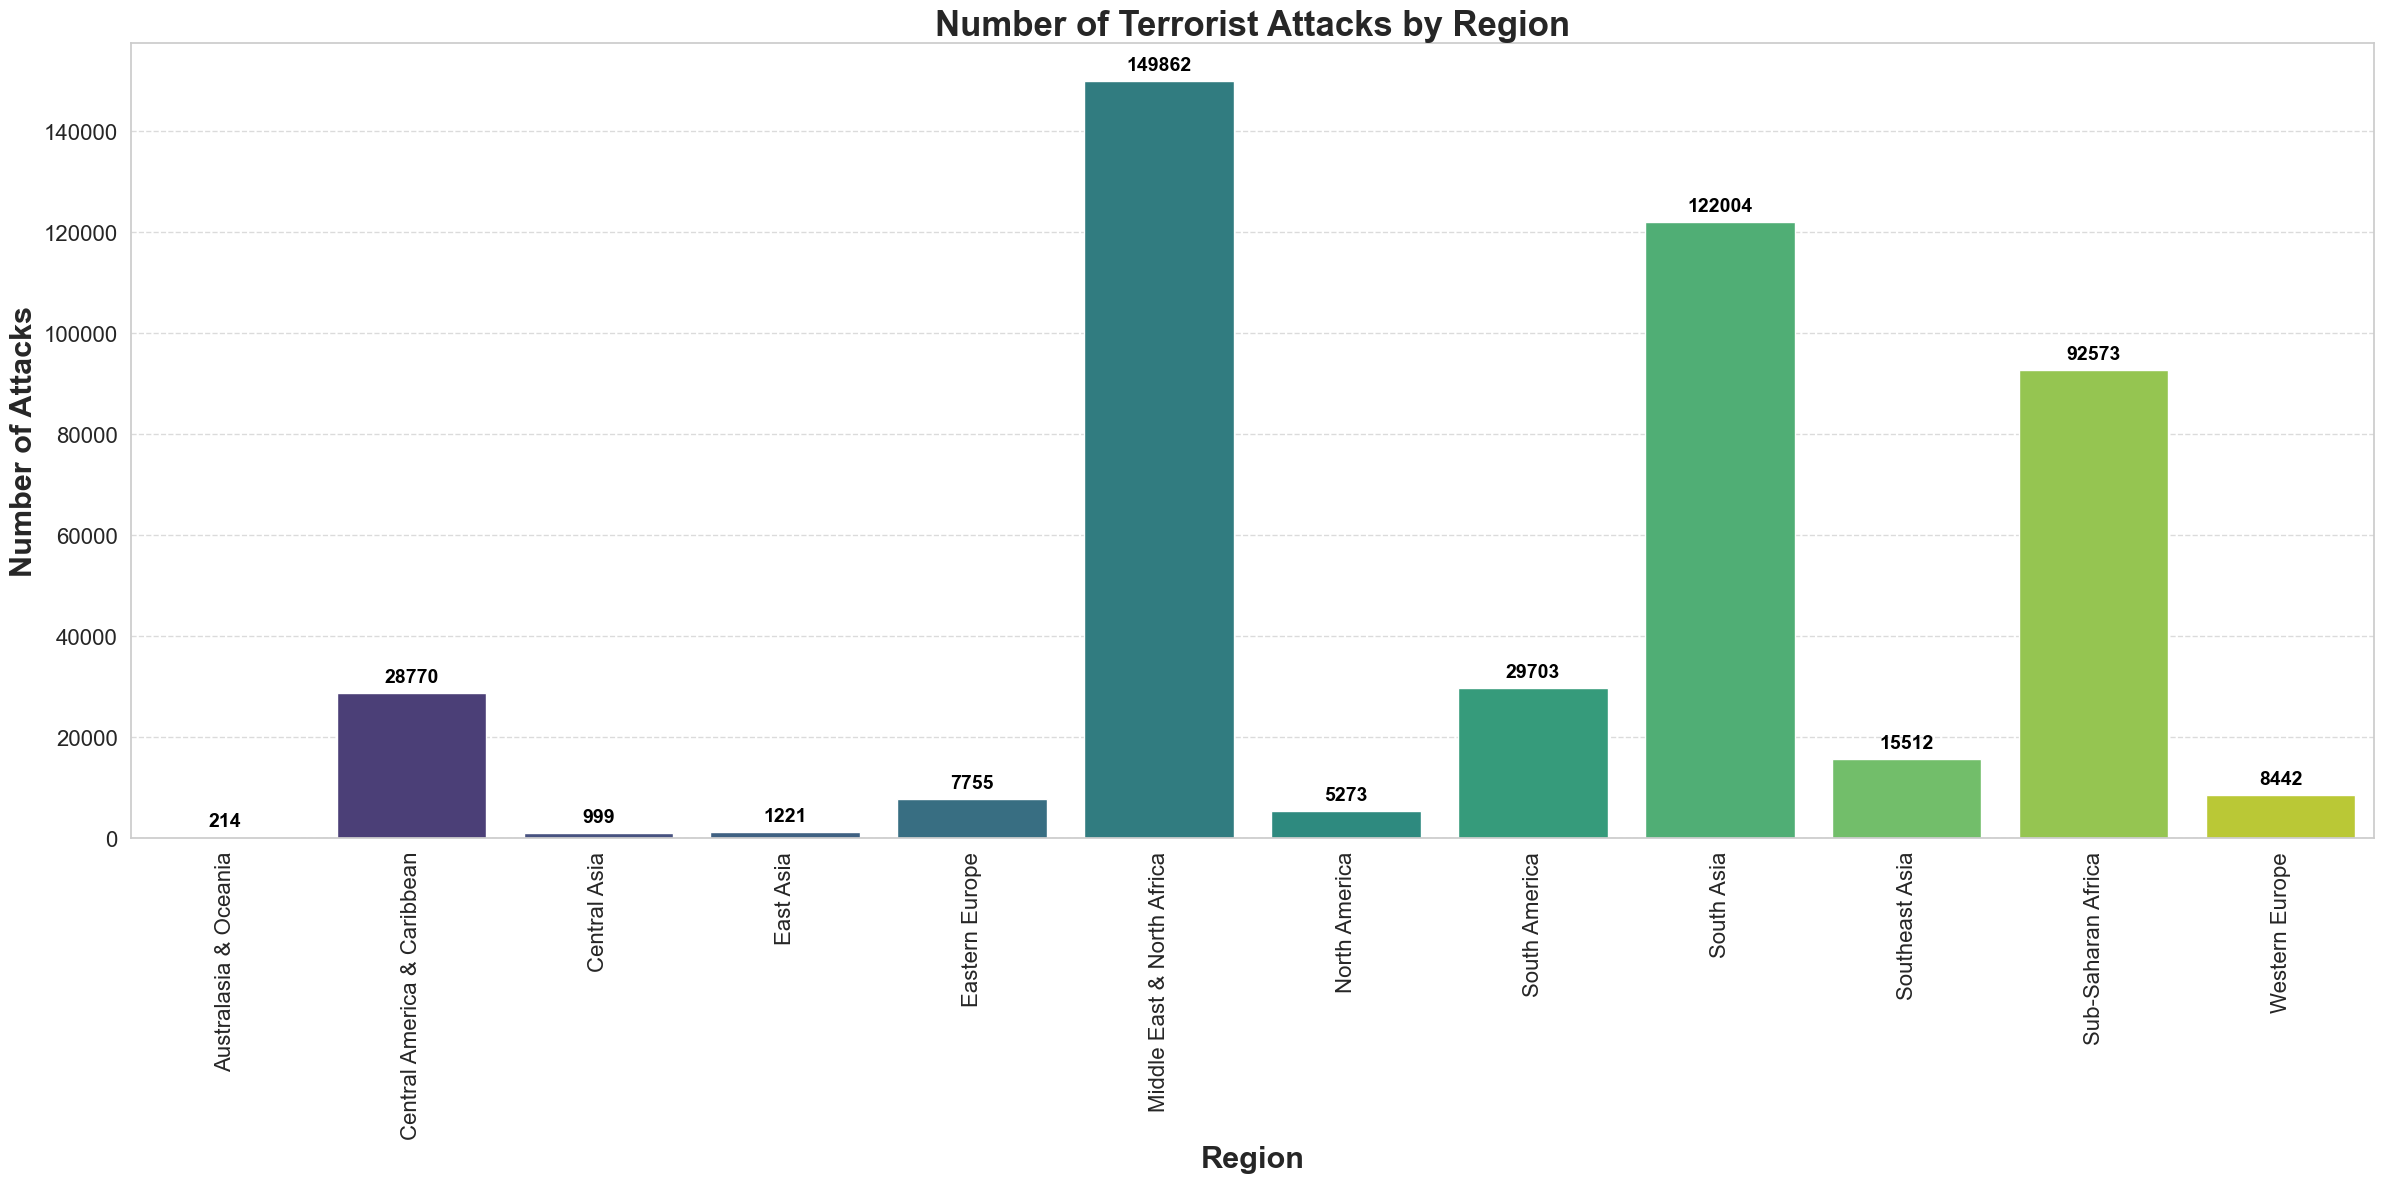

In [49]:
plt.figure(figsize=(24, 12))


palette = sns.color_palette("viridis", n_colors=len(df_total_killed_by_region))

# Create the bar plot
ax = sns.barplot(x="region_txt", y="Total_killed", data=df_total_killed_by_region, palette=palette)


plt.title('Number of Terrorist Attacks by Region', fontsize=25, weight='bold')
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Region', fontsize=22, weight='bold') 
plt.ylabel('Number of Attacks', fontsize=22, weight='bold')

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=14, weight='bold', color='black', 
                xytext=(0, 5),  # 5 points vertical offset
                textcoords='offset points')

# Improve gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
#The most dangerous areas taking into account the total number of attacks, is Middle East and North Africa, followed by South asia and Sub-Saharan Africa. 
#Being the safest Australasia & Oceania, Central Asia and East Asia.

Text(0.5, 1.0, 'Western Europe')

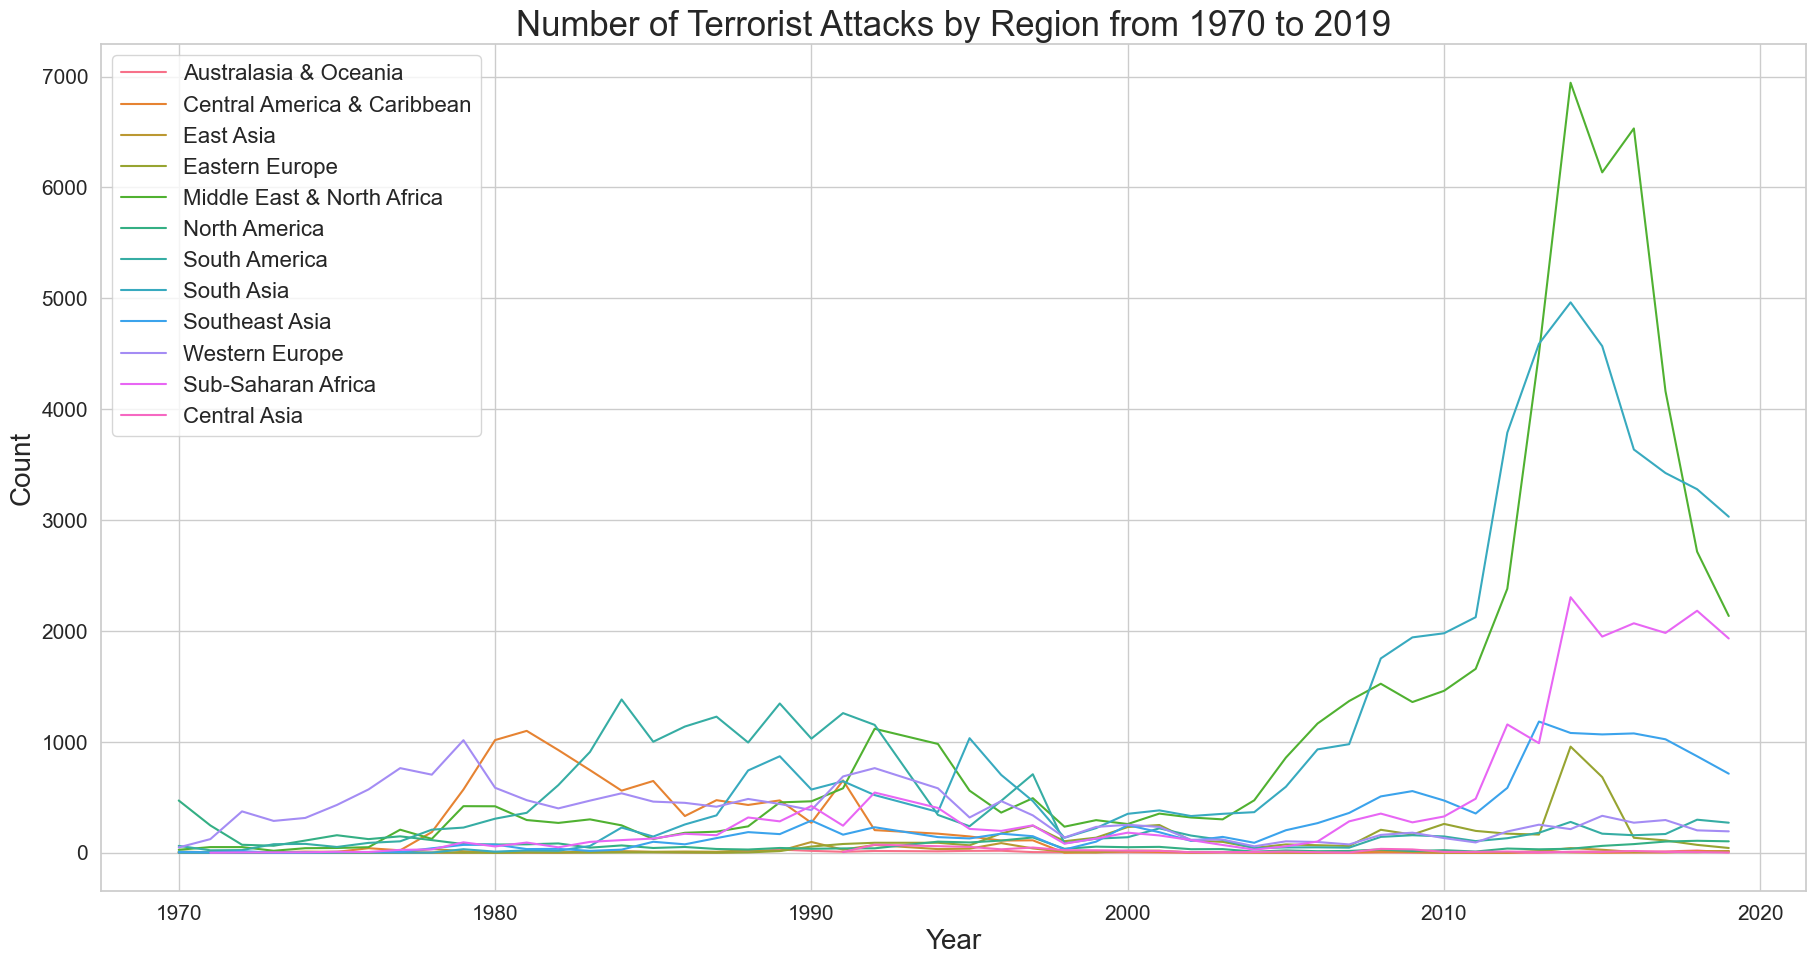

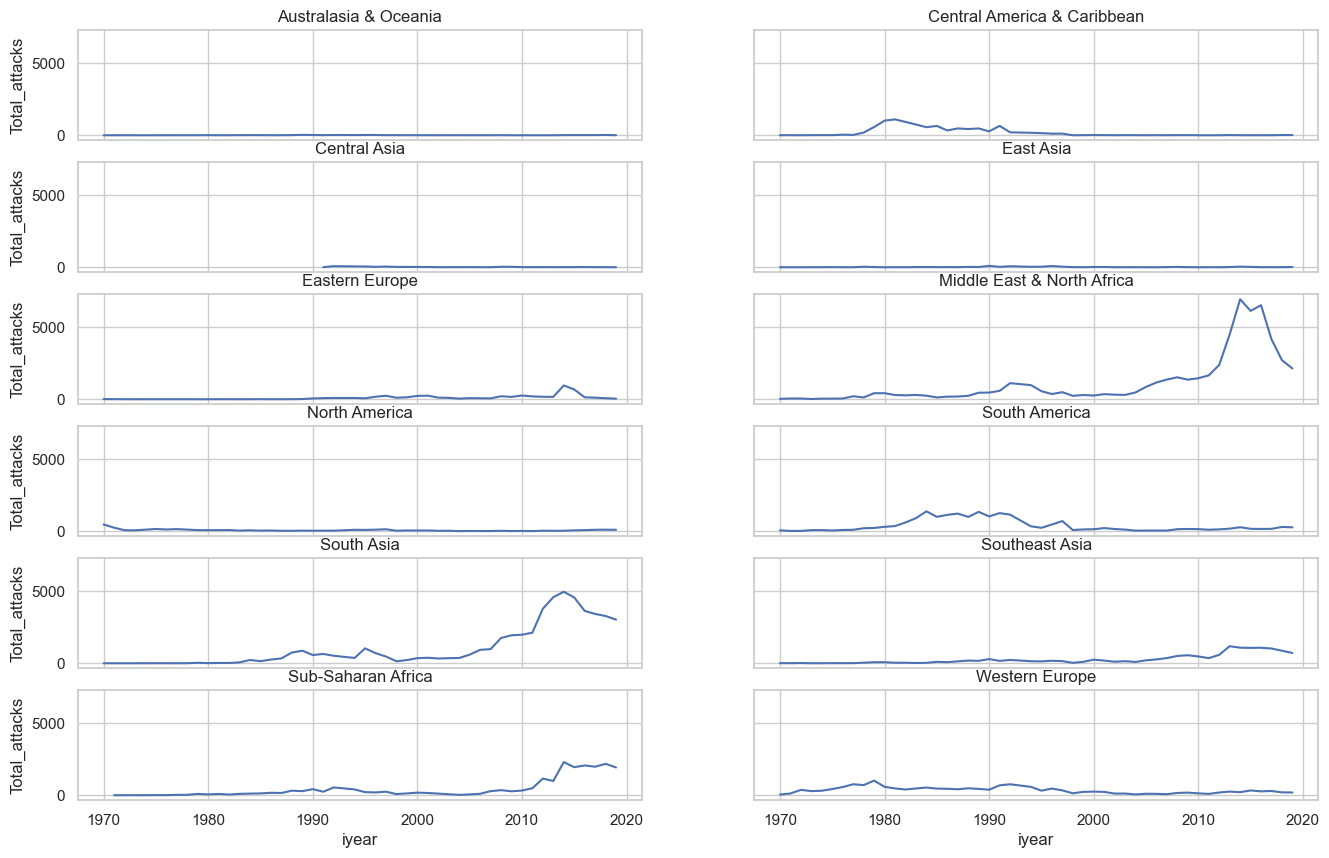

In [52]:
plt.figure(figsize=(22, 11))
sns.lineplot(data=df_total_killed_year_by_region, x='iyear', y='Total_attacks', hue='region_txt')

plt.title('Number of Terrorist Attacks by Region from 1970 to 2019', fontsize=25)
plt.legend(fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)

f, axes =  plt.subplots(6, 2, figsize=(16, 10), sharex=True, sharey=True)

sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Australasia & Oceania'],  x='iyear', y='Total_attacks', ax=axes[0,0], legend=False).set_title('Australasia & Oceania')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Central America & Caribbean'],  x='iyear', y='Total_attacks', ax=axes[0,1], legend=False).set_title('Central America & Caribbean')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Central Asia'],  x='iyear', y='Total_attacks', ax=axes[1,0], legend=False).set_title('Central Asia')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='East Asia'],  x='iyear', y='Total_attacks', ax=axes[1,1], legend=False).set_title('East Asia')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Eastern Europe'],  x='iyear', y='Total_attacks', ax=axes[2,0], legend=False).set_title('Eastern Europe')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Middle East & North Africa'],  x='iyear', y='Total_attacks', ax=axes[2,1], legend=False).set_title('Middle East & North Africa')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='North America'],  x='iyear', y='Total_attacks', ax=axes[3,0], legend=False).set_title('North America')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='South America'],  x='iyear', y='Total_attacks', ax=axes[3,1], legend=False).set_title('South America')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='South Asia'],  x='iyear', y='Total_attacks', ax=axes[4,0], legend=False).set_title('South Asia')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Southeast Asia'],  x='iyear', y='Total_attacks', ax=axes[4,1], legend=False).set_title('Southeast Asia')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Sub-Saharan Africa'],  x='iyear', y='Total_attacks', ax=axes[5,0], legend=False).set_title('Sub-Saharan Africa')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Western Europe'],  x='iyear', y='Total_attacks', ax=axes[5,1], legend=False).set_title('Western Europe')

Text(0.5, 1.0, 'Western Europe')

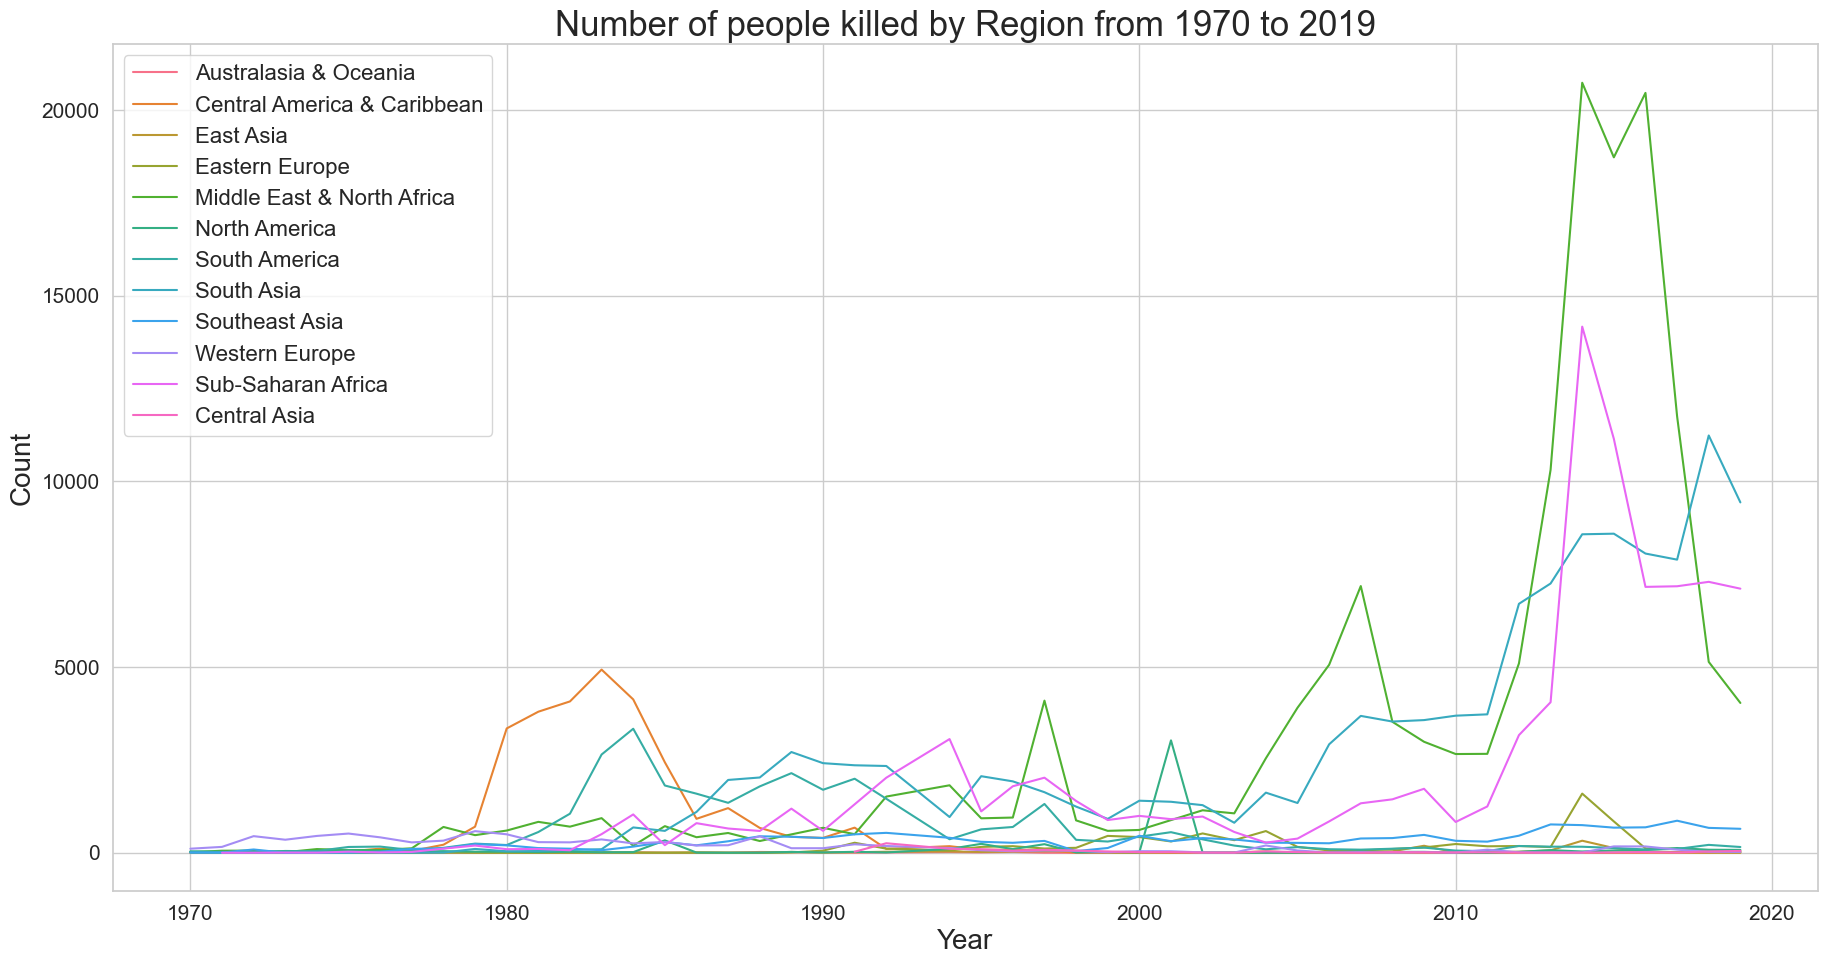

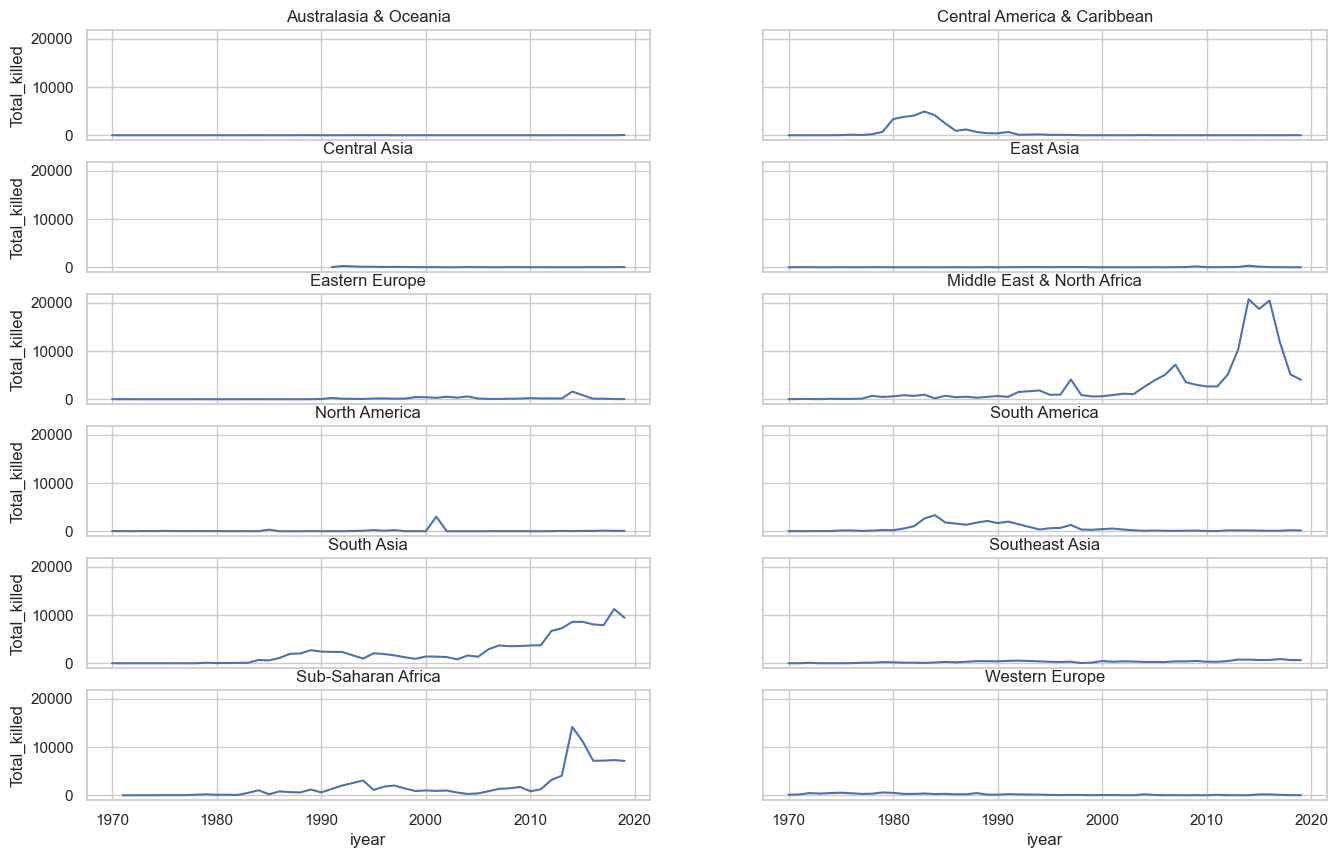

In [54]:
plt.figure(figsize=(22, 11))
sns.lineplot(data=df_total_killed_year_by_region, x='iyear', y='Total_killed', hue='region_txt')

plt.title('Number of people killed by Region from 1970 to 2019', fontsize=25)
plt.legend(fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)

f, axes =  plt.subplots(6, 2, figsize=(16, 10), sharex=True, sharey=True)

sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Australasia & Oceania'],  x='iyear', y='Total_killed', ax=axes[0,0], legend=False).set_title('Australasia & Oceania')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Central America & Caribbean'],  x='iyear', y='Total_killed', ax=axes[0,1], legend=False).set_title('Central America & Caribbean')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Central Asia'],  x='iyear', y='Total_killed', ax=axes[1,0], legend=False).set_title('Central Asia')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='East Asia'],  x='iyear', y='Total_killed', ax=axes[1,1], legend=False).set_title('East Asia')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Eastern Europe'],  x='iyear', y='Total_killed', ax=axes[2,0], legend=False).set_title('Eastern Europe')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Middle East & North Africa'],  x='iyear', y='Total_killed', ax=axes[2,1], legend=False).set_title('Middle East & North Africa')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='North America'],  x='iyear', y='Total_killed', ax=axes[3,0], legend=False).set_title('North America')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='South America'],  x='iyear', y='Total_killed', ax=axes[3,1], legend=False).set_title('South America')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='South Asia'],  x='iyear', y='Total_killed', ax=axes[4,0], legend=False).set_title('South Asia')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Southeast Asia'],  x='iyear', y='Total_killed', ax=axes[4,1], legend=False).set_title('Southeast Asia')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Sub-Saharan Africa'],  x='iyear', y='Total_killed', ax=axes[5,0], legend=False).set_title('Sub-Saharan Africa')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Western Europe'],  x='iyear', y='Total_killed', ax=axes[5,1], legend=False).set_title('Western Europe')

Text(0.5, 1.0, 'Western Europe')

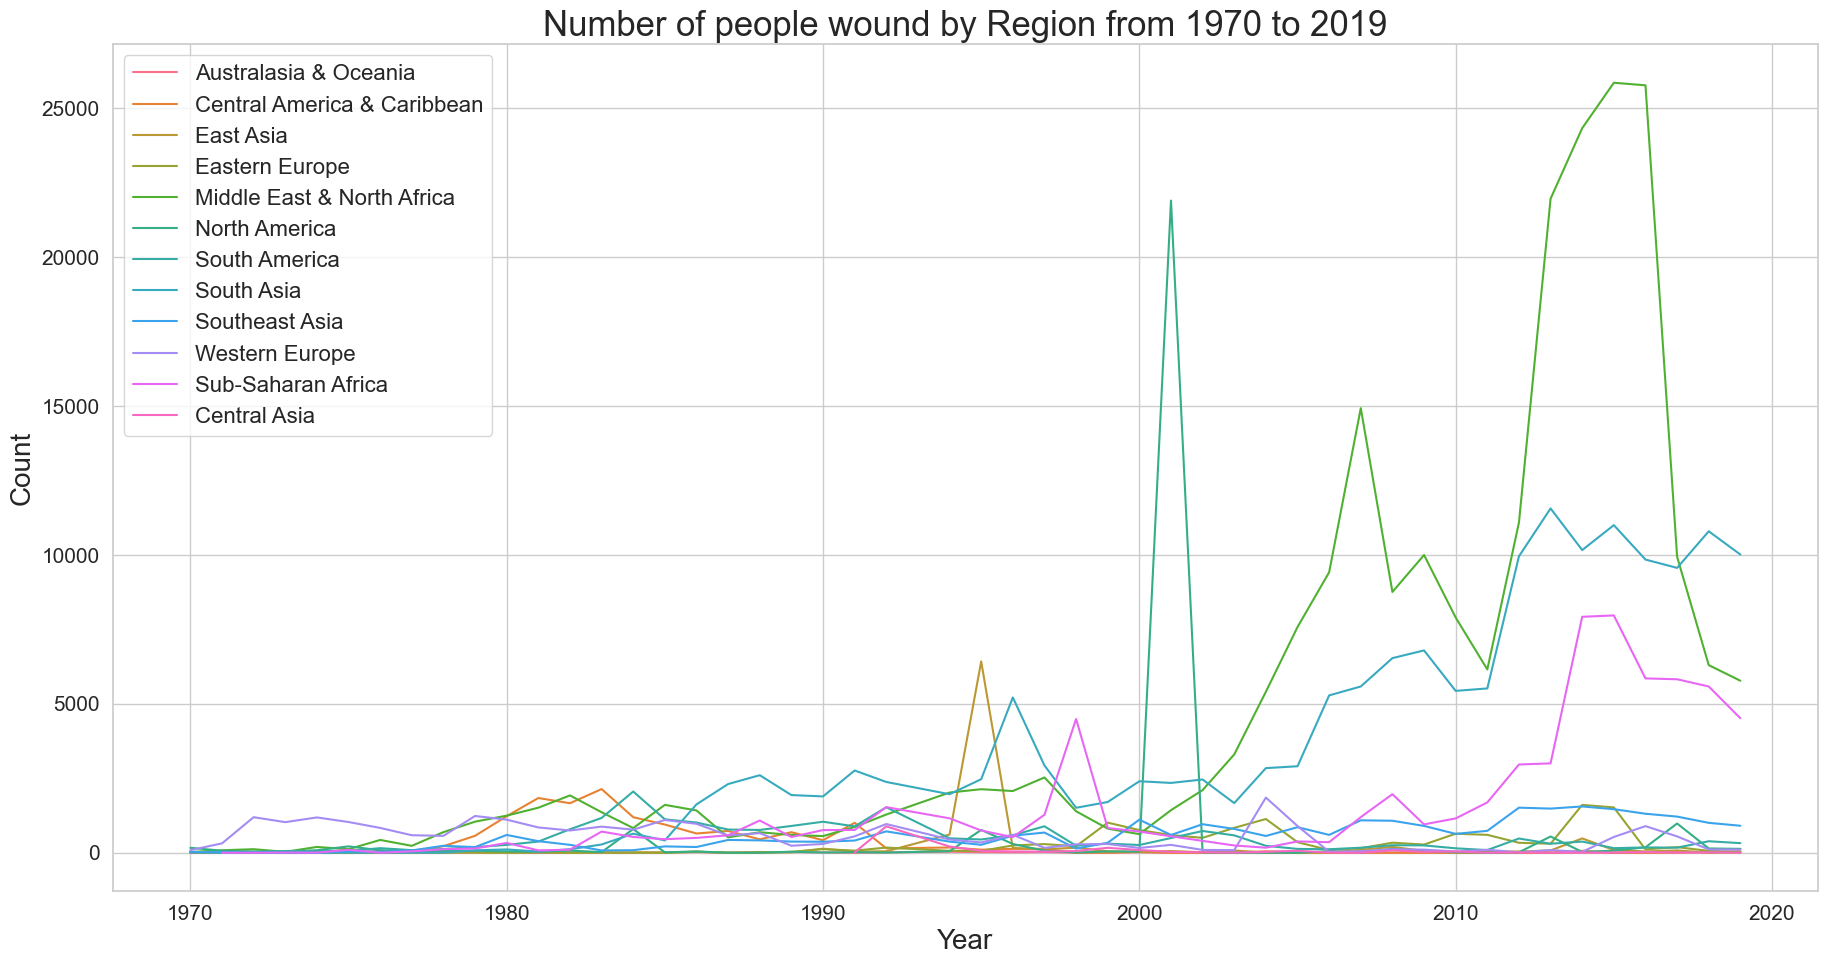

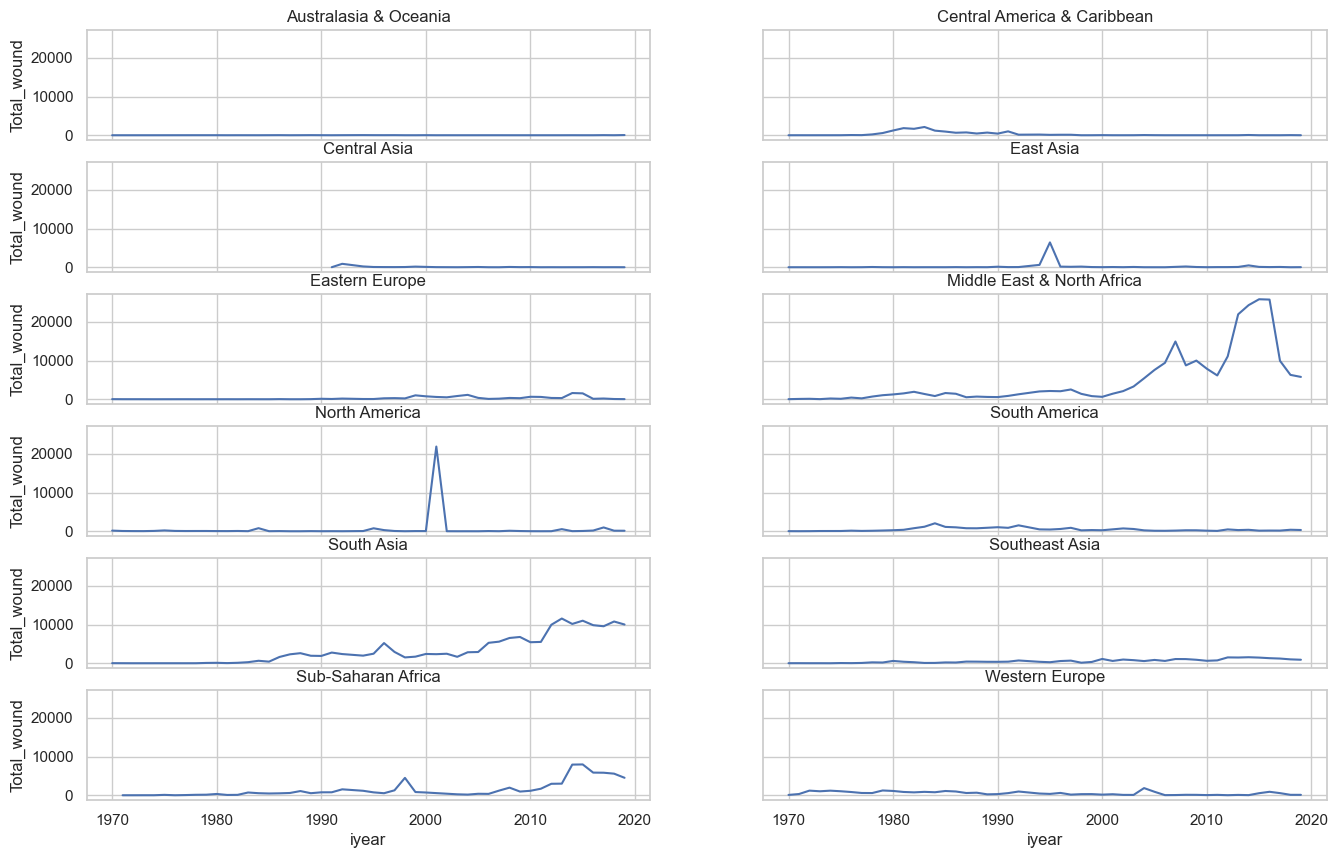

In [56]:
plt.figure(figsize=(22, 11))
sns.lineplot(data=df_total_killed_year_by_region, x='iyear', y='Total_wound', hue='region_txt')

plt.title('Number of people wound by Region from 1970 to 2019', fontsize=25)
plt.legend(fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)

f, axes =  plt.subplots(6, 2, figsize=(16, 10), sharex=True, sharey=True)

sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Australasia & Oceania'],  x='iyear', y='Total_wound', ax=axes[0,0], legend=False).set_title('Australasia & Oceania')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Central America & Caribbean'],  x='iyear', y='Total_wound', ax=axes[0,1], legend=False).set_title('Central America & Caribbean')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Central Asia'],  x='iyear', y='Total_wound', ax=axes[1,0], legend=False).set_title('Central Asia')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='East Asia'],  x='iyear', y='Total_wound', ax=axes[1,1], legend=False).set_title('East Asia')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Eastern Europe'],  x='iyear', y='Total_wound', ax=axes[2,0], legend=False).set_title('Eastern Europe')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Middle East & North Africa'],  x='iyear', y='Total_wound', ax=axes[2,1], legend=False).set_title('Middle East & North Africa')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='North America'],  x='iyear', y='Total_wound', ax=axes[3,0], legend=False).set_title('North America')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='South America'],  x='iyear', y='Total_wound', ax=axes[3,1], legend=False).set_title('South America')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='South Asia'],  x='iyear', y='Total_wound', ax=axes[4,0], legend=False).set_title('South Asia')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Southeast Asia'],  x='iyear', y='Total_wound', ax=axes[4,1], legend=False).set_title('Southeast Asia')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Sub-Saharan Africa'],  x='iyear', y='Total_wound', ax=axes[5,0], legend=False).set_title('Sub-Saharan Africa')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Western Europe'],  x='iyear', y='Total_wound', ax=axes[5,1], legend=False).set_title('Western Europe')

In [57]:
#Attack Type Analysis
#In this section, we will analyze which types of attacks are the most dangerous and most frequently used.

In [58]:
df_total_types_killed_by_country = df.groupby(['region_txt','attacktype1_txt']).agg(Total_attacks=('nkill', 'count'),Total_killed=('nkill', 'sum'),Total_wound=('nwound', 'sum')).reset_index()
df_total_types_killed_by_country

region_txt                      attacktype1_txt  Total_attacks  Total_killed  Total_wound
0          Australasia & Oceania                        Armed Assault             55           135          146
1          Australasia & Oceania                        Assassination             30            33            8
2          Australasia & Oceania                    Bombing/Explosion             74            17           89
3          Australasia & Oceania       Facility/Infrastructure Attack             91             0           16
4          Australasia & Oceania                            Hijacking              3             0            0
5          Australasia & Oceania  Hostage Taking (Barricade Incident)              6             6           10
6          Australasia & Oceania          Hostage Taking (Kidnapping)             13             7           20
7          Australasia & Oceania                      Unarmed Assault             11             1           41
8          Australasia & Oceania                              Unknown             16            15            6
9    Central America & Caribbean                        Armed Assault           3839         21561         8100
10   Central America & Caribbean                        Assassination           1228          1654          282
11   Central America & Caribbean                    Bombing/Explosion           2912          3615         4661
12   Central America & Caribbean       Facility/Infrastructure Attack            385           369          485
13   Central America & Caribbean                            Hijacking             25             8           10
14   Central America & Caribbean  Hostage Taking (Barricade Incident)            181           144          178
15   Central America & Caribbean          Hostage Taking (Kidnapping)            475           619          588
16   Central America & Caribbean                      Unarmed Assault             19            25           19
17   Central America & Caribbean                              Unknown            310           775          426
18                  Central Asia                        Armed Assault            118           392          997
19                  Central Asia                        Assassination            113           136           57
20                  Central Asia                    Bombing/Explosion            233           336          829
21                  Central Asia       Facility/Infrastructure Attack             21             3           15
22                  Central Asia                            Hijacking              8            14           16
23                  Central Asia  Hostage Taking (Barricade Incident)              2            38            4
24                  Central Asia          Hostage Taking (Kidnapping)             44            11            9
25                  Central Asia                      Unarmed Assault              4             1            9
26                  Central Asia                              Unknown             16            68           20
27                     East Asia                        Armed Assault            127           622          738
28                     East Asia                        Assassination             56            44           39
29                     East Asia                    Bombing/Explosion            330           430         1201
30                     East Asia       Facility/Infrastructure Attack            200            56          172
31                     East Asia                            Hijacking             18             9           17
32                     East Asia  Hostage Taking (Barricade Incident)              3            19           26
33                     East Asia          Hostage Taking (Kidnapping)             15             7            7
34                     East Asia                      Unarmed Assault             47            26    

In [59]:
df_total_types_killed = df.groupby(['attacktype1_txt']).agg(Total_attacks=('nkill', 'count'),Total_killed=('nkill', 'sum'),Total_wound=('nwound', 'sum')).reset_index()
df_total_types_killed

attacktype1_txt  Total_attacks  Total_killed  Total_wound
0                        Armed Assault          45844        168964        96333
1                        Assassination          20400         25952        19427
2                    Bombing/Explosion          93981        175717       409075
3       Facility/Infrastructure Attack          11467          5403         6101
4                            Hijacking            703          3837        22633
5  Hostage Taking (Barricade Incident)           1095          5095         4818
6          Hostage Taking (Kidnapping)          12684         34473        19555
7                      Unarmed Assault           1153           884        14823
8                              Unknown           9228         42003        23764

C:\Users\dev17\AppData\Local\Temp\ipykernel_32552\2244985512.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




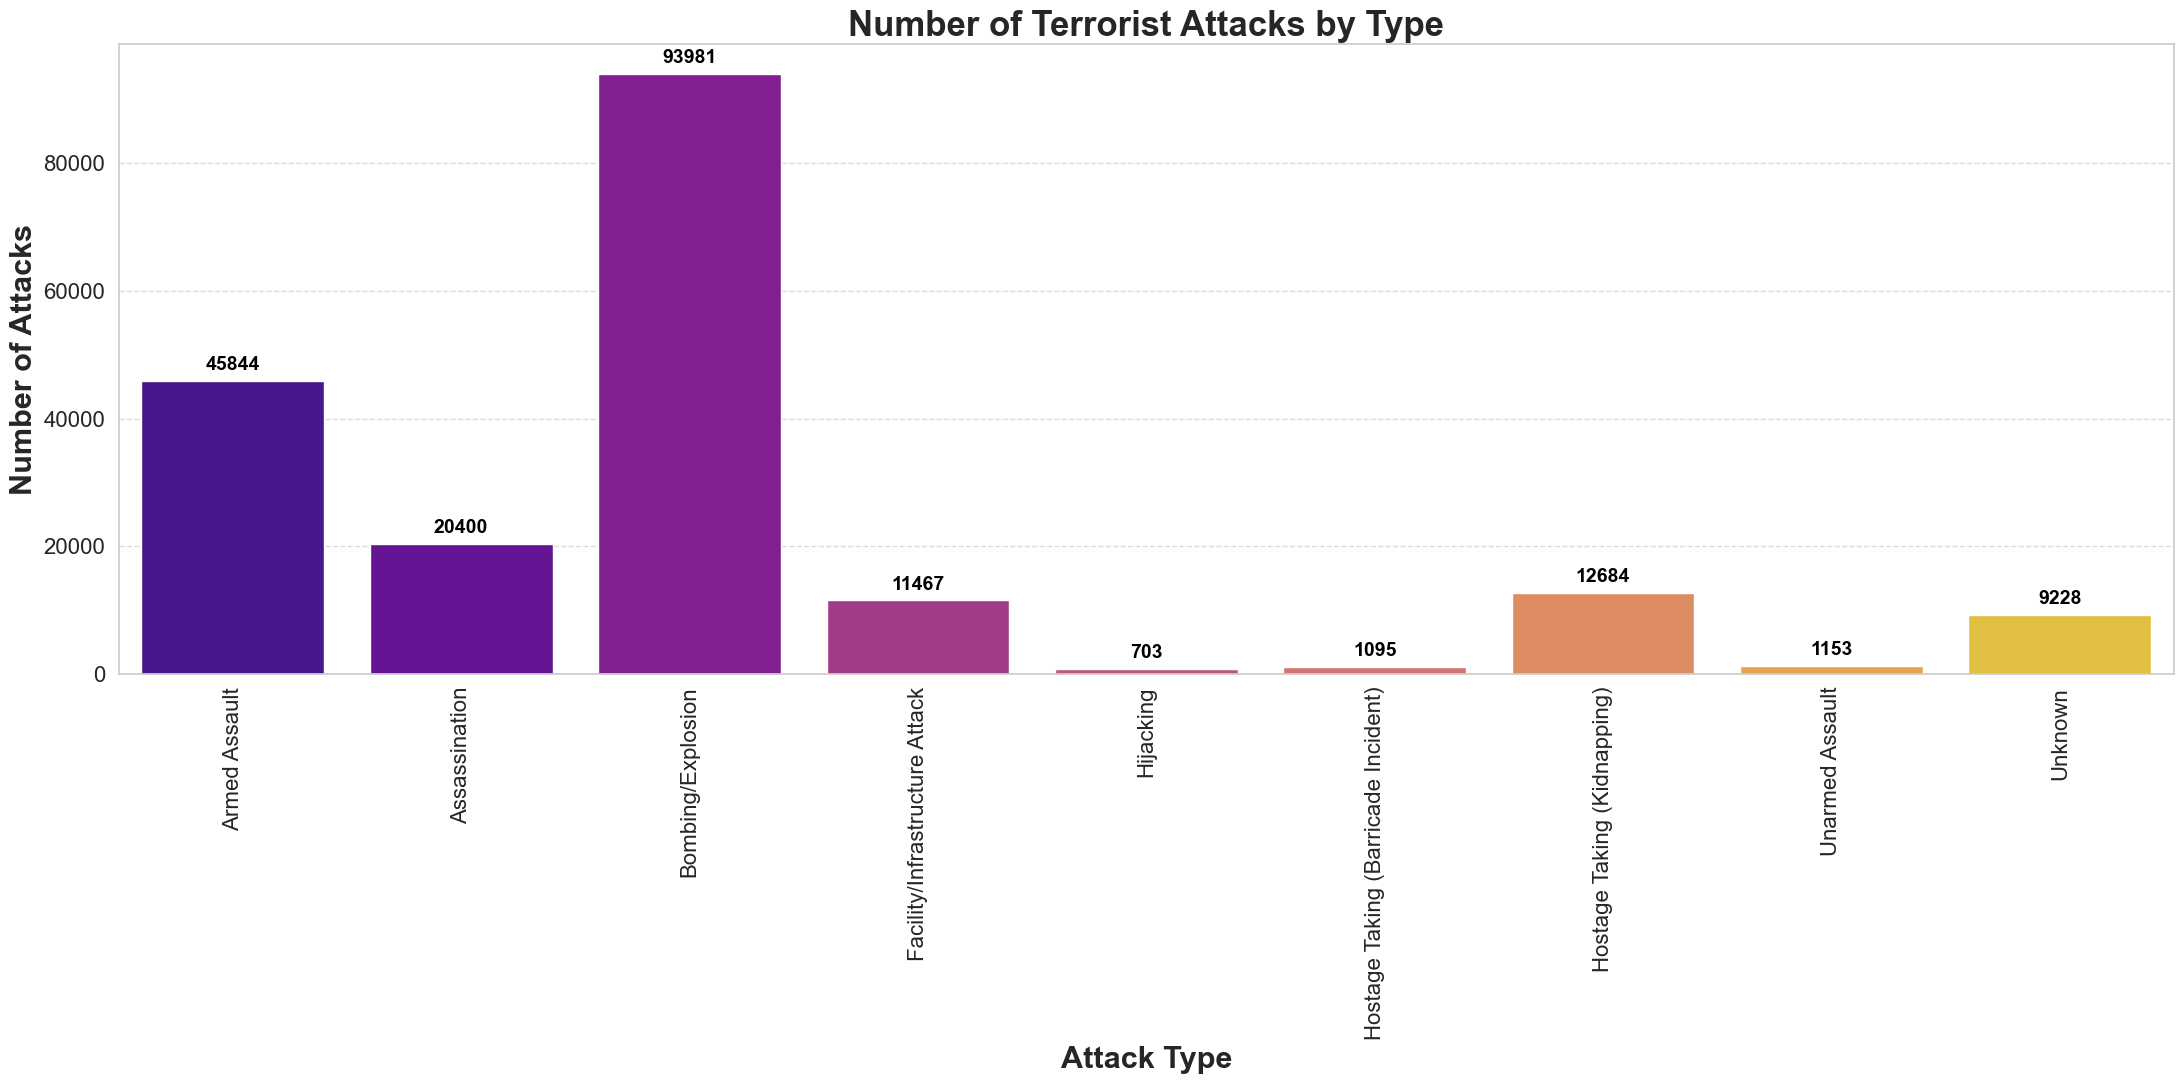

In [62]:
plt.figure(figsize=(22, 11))

# Set a more appealing color palette
palette = sns.color_palette("plasma", n_colors=len(df_total_types_killed['attacktype1_txt'].unique()))

# Create the bar plot
ax = sns.barplot(x='attacktype1_txt', y='Total_attacks', data=df_total_types_killed, palette=palette)

# Add titles and labels
plt.title('Number of Terrorist Attacks by Type', fontsize=25, weight='bold')
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Attack Type', fontsize=22, weight='bold') 
plt.ylabel('Number of Attacks', fontsize=22, weight='bold')

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=14, weight='bold', color='black', 
                xytext=(0, 5),  # 5 points vertical offset
                textcoords='offset points')

# Improve gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [63]:
#the most frequent used terroris attack method is Bombing/Explosion followed by Armed Assault. 
#Hijacking, Unarmed Assaults and Hostage Taking are not very common methods used by terrorists

C:\Users\dev17\AppData\Local\Temp\ipykernel_32552\451269306.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




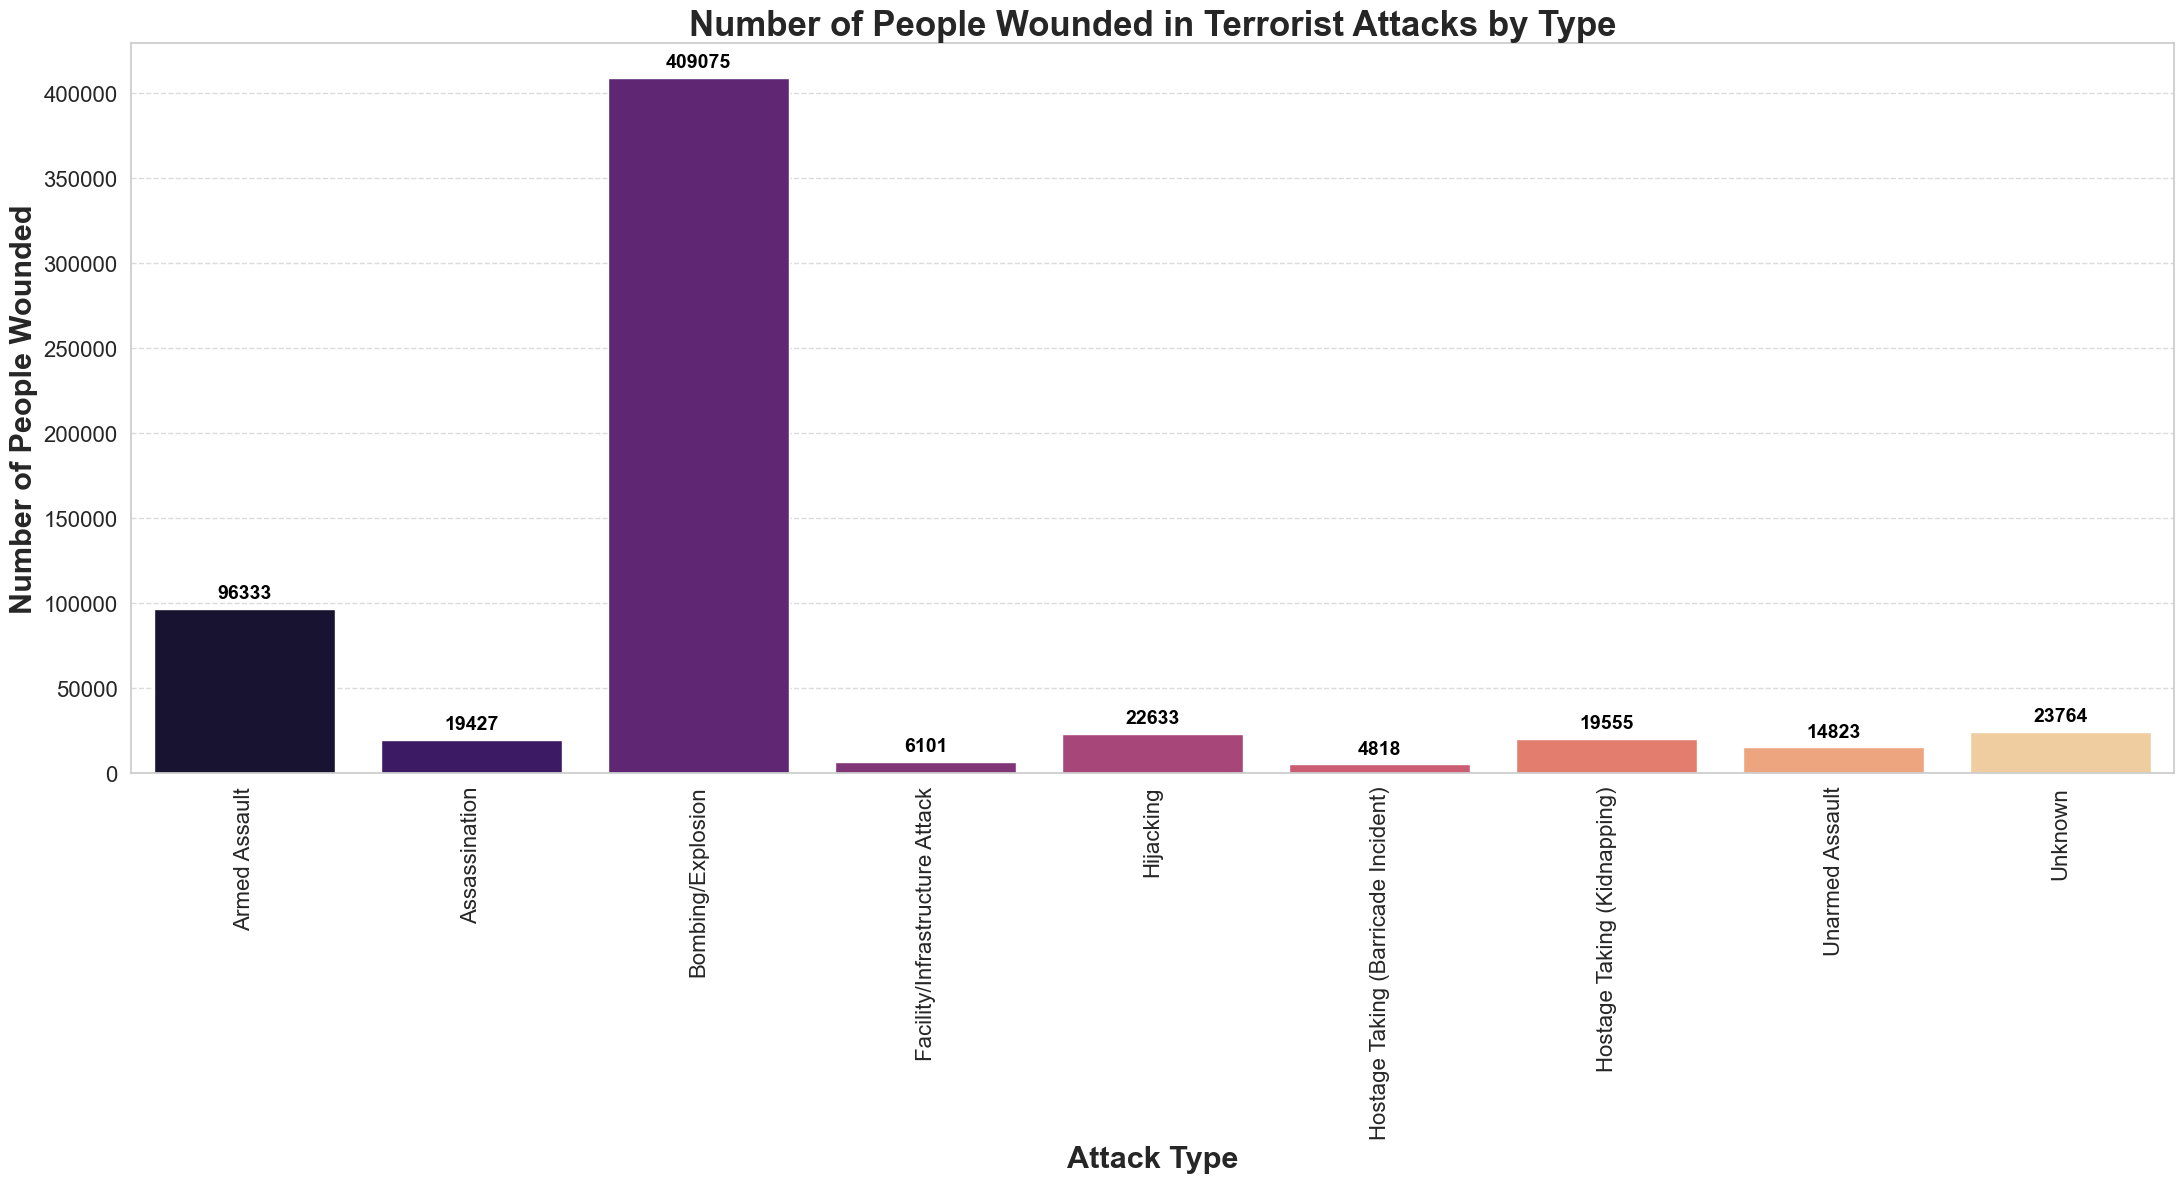

In [66]:
plt.figure(figsize=(22, 12))

# Set a more appealing color palette
palette = sns.color_palette("magma", n_colors=len(df_total_types_killed['attacktype1_txt'].unique()))

# Create the bar plot
ax = sns.barplot(x='attacktype1_txt', y='Total_wound', data=df_total_types_killed, palette=palette)

# Add titles and labels
plt.title('Number of People Wounded in Terrorist Attacks by Type', fontsize=25, weight='bold')
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Attack Type', fontsize=22, weight='bold') 
plt.ylabel('Number of People Wounded', fontsize=22, weight='bold')

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=14, weight='bold', color='black', 
                xytext=(0, 5),  # 5 points vertical offset
                textcoords='offset points')

# Improve gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [69]:
#most people wounded by bombing as well
#Now we perform Trend analysis of type of attacks during the period (1970-2019)

In [70]:
df_total_types_killed_year = df.groupby(['iyear','attacktype1_txt']).agg(Total_attacks=('nkill', 'count'),Total_killed=('nkill', 'sum'),Total_wound=('nwound', 'sum')).reset_index()
df_total_types_killed_year

iyear                      attacktype1_txt  Total_attacks  Total_killed  Total_wound
0     1970                        Armed Assault             61            56           77
1     1970                        Assassination             21            17           24
2     1970                    Bombing/Explosion            332            96          184
3     1970       Facility/Infrastructure Attack            174            27           60
4     1970                            Hijacking             11             1            1
5     1970  Hostage Taking (Barricade Incident)              3             0            0
6     1970          Hostage Taking (Kidnapping)             33            18           12
7     1970                      Unarmed Assault              3             0            5
8     1970                              Unknown              5             3            2
9     1971                        Armed Assault             43            28           38
10    1971                        Assassination             70            73          184
11    1971                    Bombing/Explosion            234           155          207
12    1971       Facility/Infrastructure Attack             88            19           57
13    1971                            Hijacking              6             2            3
14    1971  Hostage Taking (Barricade Incident)              1             0            0
15    1971          Hostage Taking (Kidnapping)             18            13           19
16    1971                              Unknown              3             6            3
17    1972                        Armed Assault             63            78          169
18    1972                        Assassination            252           212          531
19    1972                    Bombing/Explosion            185           311          635
20    1972       Facility/Infrastructure Attack             18             5           17
21    1972                            Hijacking             12             5           10
22    1972  Hostage Taking (Barricade Incident)              4             0            1
23    1972          Hostage Taking (Kidnapping)             16            14           24
24    1972                              Unknown              1             1            0
25    1973                        Armed Assault             61            63           82
26    1973                        Assassination            162           171          380
27    1973                    Bombing/Explosion            148           113          584
28    1973       Facility/Infrastructure Attack             36            16           25
29    1973                            Hijacking              8            34           10
30    1973  Hostage Taking (Barricade Incident)              7            38           55
31    1973          Hostage Taking (Kidnapping)             39            25           36
32    1973                      Unarmed Assault              3             2            3
33    1973                              Unknown              1             0            1
34    1974                        Armed Assault             44            47           71
35    1974                        Assassination            158           161          367
36    1974                    Bombing/Explosion            285           352         1028
37    1974       Facility/Infrastructure Attack             42            16           32
38    1974                            Hijacking              3             1            2
39    1974  Hostage Taking (Barricade Incident)              5            37            7
40    1974          Hostage Taking (Kidnapping)             35            27           27
41    1974                      Unarmed Assault              4             1            4
42    1974                              Unknown              1             7            5
43    1975                        Armed Assau

Text(0, 0.5, 'Count')

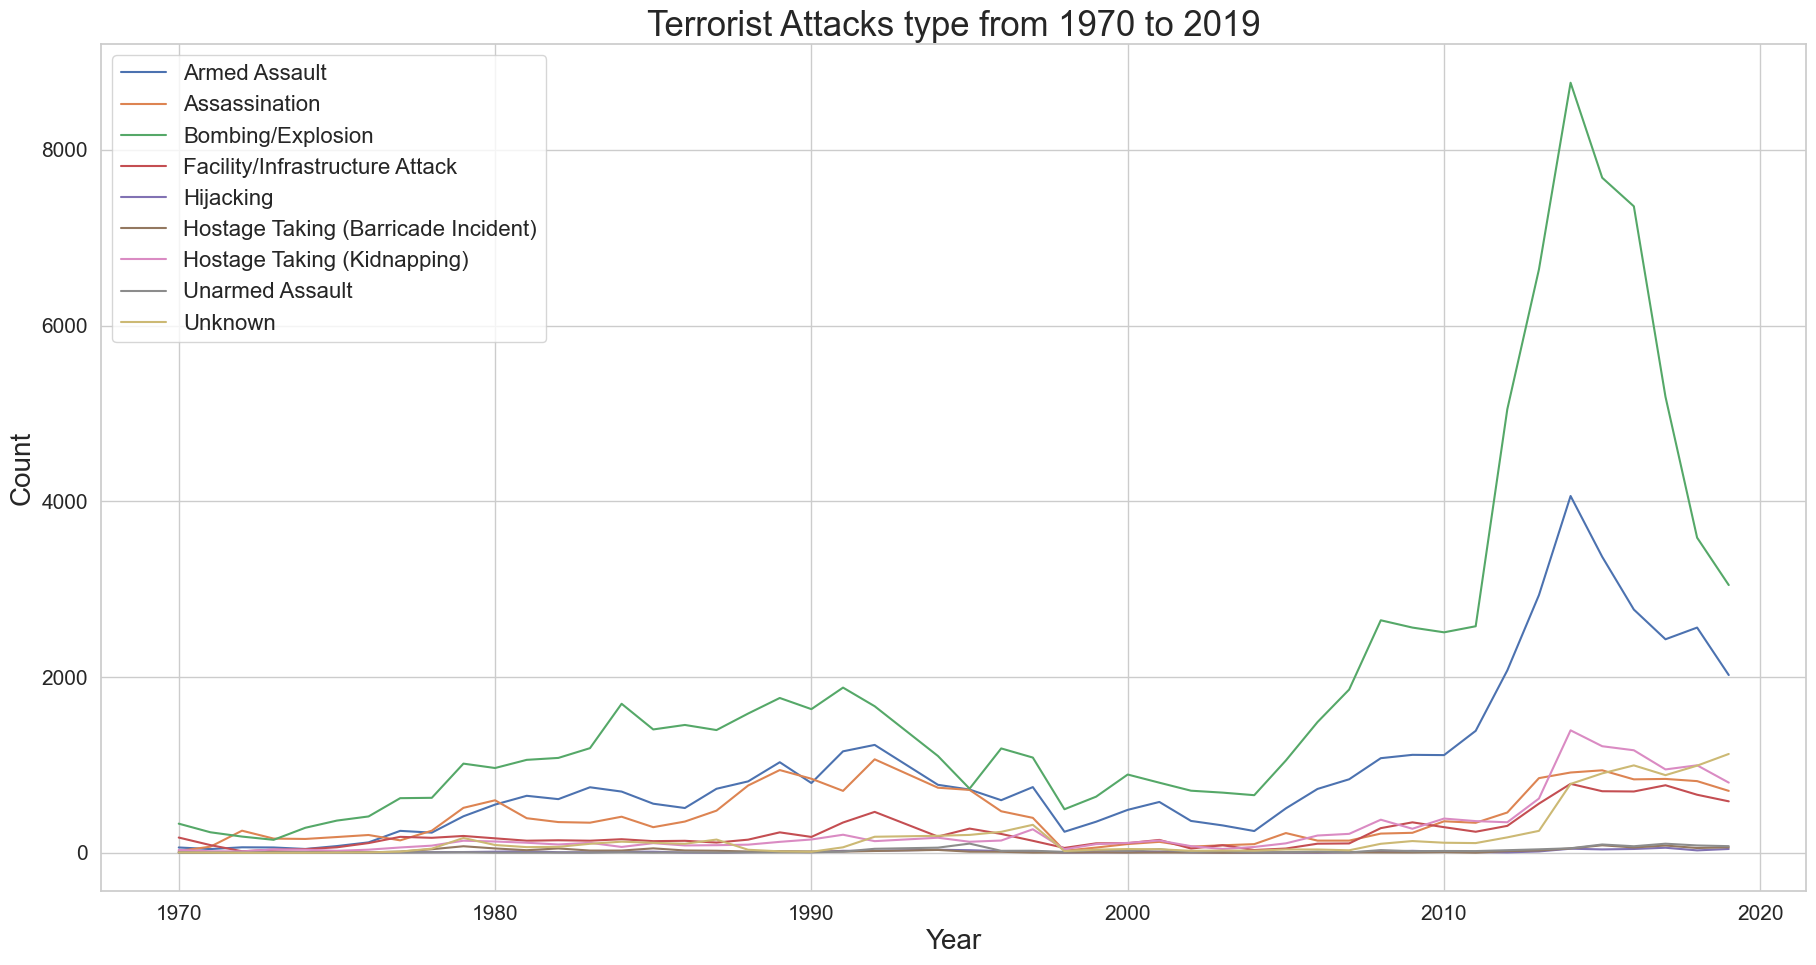

In [72]:
plt.figure(figsize=(22, 11))
sns.lineplot(data=df_total_types_killed_year, x='iyear', y='Total_attacks', hue='attacktype1_txt')

plt.title('Terrorist Attacks type from 1970 to 2019', fontsize=25)
plt.legend(fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)

In [73]:
#Therefore Bombing/Explotion and Armed Assault are the most used methods of attacks used
#and has been increasing in trends in the last decade exponentilly, achieving the worst year in 2014.

In [74]:
#target type analysis
df_total_types_targeted = df.groupby(['targtype1_txt']).agg(Total_attacks=('nkill', 'count'),Total_killed=('nkill', 'sum'),Total_wound=('nwound', 'sum')).reset_index()
df_total_types_targeted

targtype1_txt  Total_attacks  Total_killed  Total_wound
0                 Abortion Related            265            18           55
1              Airports & Aircraft           1362          3790         3910
2                         Business          21408         27278        62508
3          Educational Institution           4604          4323        11362
4             Food or Water Supply            327           417          392
5          Government (Diplomatic)           3677          3660        11592
6             Government (General)          22697         30005        48166
7              Journalists & Media           3124          2065         2707
8                         Maritime            348          1180         1021
9                         Military          30887        118734        91888
10                             NGO           1049          1284         1258
11                           Other            164           313          548
12                          Police          26905         62975        76640
13     Private Citizens & Property          48516        154222       211156
14  Religious Figures/Institutions           4857         14271        26320
15               Telecommunication           1124           322          734
16    Terrorists/Non-State Militia           3455         10816        10653
17                        Tourists            437           773         1415
18                  Transportation           6822         14273        41626
19                         Unknown           6744          5043         3838
20                       Utilities           5759          2887         3036
21         Violent Political Party           2024          3679         5704

C:\Users\dev17\AppData\Local\Temp\ipykernel_32552\973823625.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




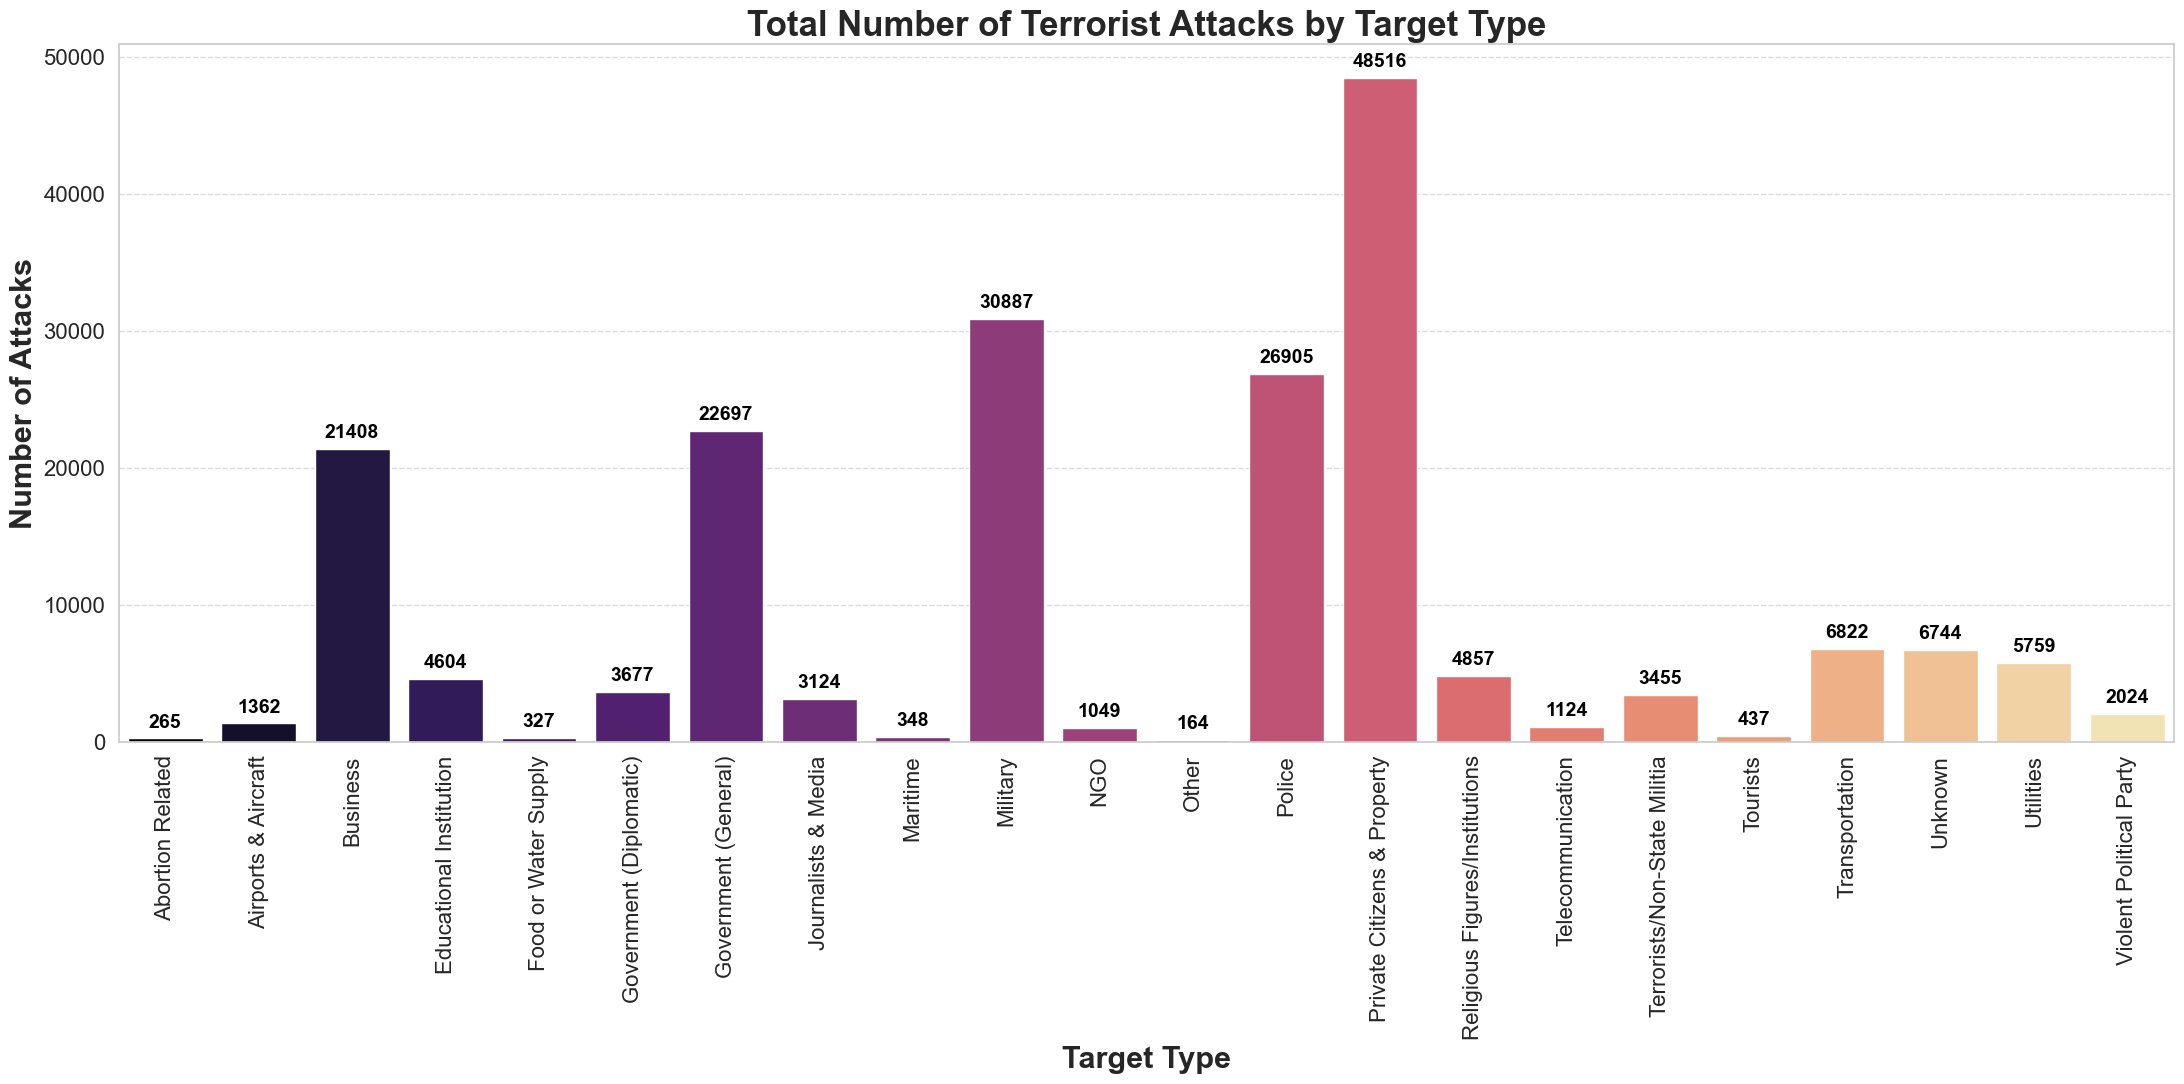

In [78]:
plt.figure(figsize=(22, 11))

# Set a more appealing color palette
palette = sns.color_palette("magma", n_colors=len(df_total_types_targeted['targtype1_txt'].unique()))

# Create the bar plot
ax = sns.barplot(x='targtype1_txt', y='Total_attacks', data=df_total_types_targeted, palette=palette)

# Add titles and labels
plt.title('Total Number of Terrorist Attacks by Target Type', fontsize=25, weight='bold')
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Target Type', fontsize=22, weight='bold') 
plt.ylabel('Number of Attacks', fontsize=22, weight='bold')

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=14, weight='bold', color='black', 
                xytext=(0, 5),  # 5 points vertical offset
                textcoords='offset points')

# Improve gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [79]:
#As we can see, the most attacked target is Private Citizens and Property, followed by Military, Police and Government

#Analysis by Terroris Group:

In [96]:
df_total_sucess_by_group = df.groupby(['gname']).agg(Total_attacks=('nkill', 'count'),Total_killed=('nkill', 'sum'),Total_wound=('nwound', 'sum')).sort_values(by="Total_attacks", ascending=False).reset_index()
df_total_sucess_by_group.head(30)

gname  Total_attacks  Total_killed  Total_wound
0                                            Unknown          87918        121629       229829
1                                            Taliban          10070         46085        41770
2        Islamic State of Iraq and the Levant (ISIL)           6834         43617        37008
3                                  Shining Path (SL)           4314         11103         4405
4                                         Al-Shabaab           4110         12984        12776
5                                         Boko Haram           3005         24173        13579
6   Farabundo Marti National Liberation Front (FMLN)           2991          9016         5979
7                            New People's Army (NPA)           2980          3815         3640
8                    Houthi extremists (Ansar Allah)           2727          6623         8064
9                        Irish Republican Army (IRA)           2660          2090         6661
10                    Kurdistan Workers' Party (PKK)           2387          4626         5513
11     Revolutionary Armed Forces of Colombia (FARC)           2335          5228         4725
12    Communist Party of India - Maoist (CPI-Maoist)           2035          2526         1926
13               Basque Fatherland and Freedom (ETA)           1993          1090         2696
14                                           Maoists           1975          1846         1921
15        National Liberation Army of Colombia (ELN)           1651          1802         1819
16           Liberation Tigers of Tamil Eelam (LTTE)           1550         10562        10745
17                   Tehrik-i-Taliban Pakistan (TTP)           1467          6341        10139
18          Al-Qaida in the Arabian Peninsula (AQAP)           1090          3793         3587
19                                      Palestinians           1082           787         1956
20                                 Fulani extremists            932          4798         2219
21                                       Separatists            843          1120         1817
22           Manuel Rodriguez Patriotic Front (FPMR)            812           215          481
23                                 Muslim extremists            795          1886         2882
24                 Nicaraguan Democratic Force (FDN)            677          5216         1533
25                                   Sikh Extremists            674          2651         2050
26         Corsican National Liberation Front (FLNC)            635            61          173
27                                  Al-Qaida in Iraq            635          4382        10404
28                         Donetsk People's Republic            627          1752         1710
29                            Abu Sayyaf Group (ASG)            575           883         1803

C:\Users\dev17\AppData\Local\Temp\ipykernel_32552\2398120766.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




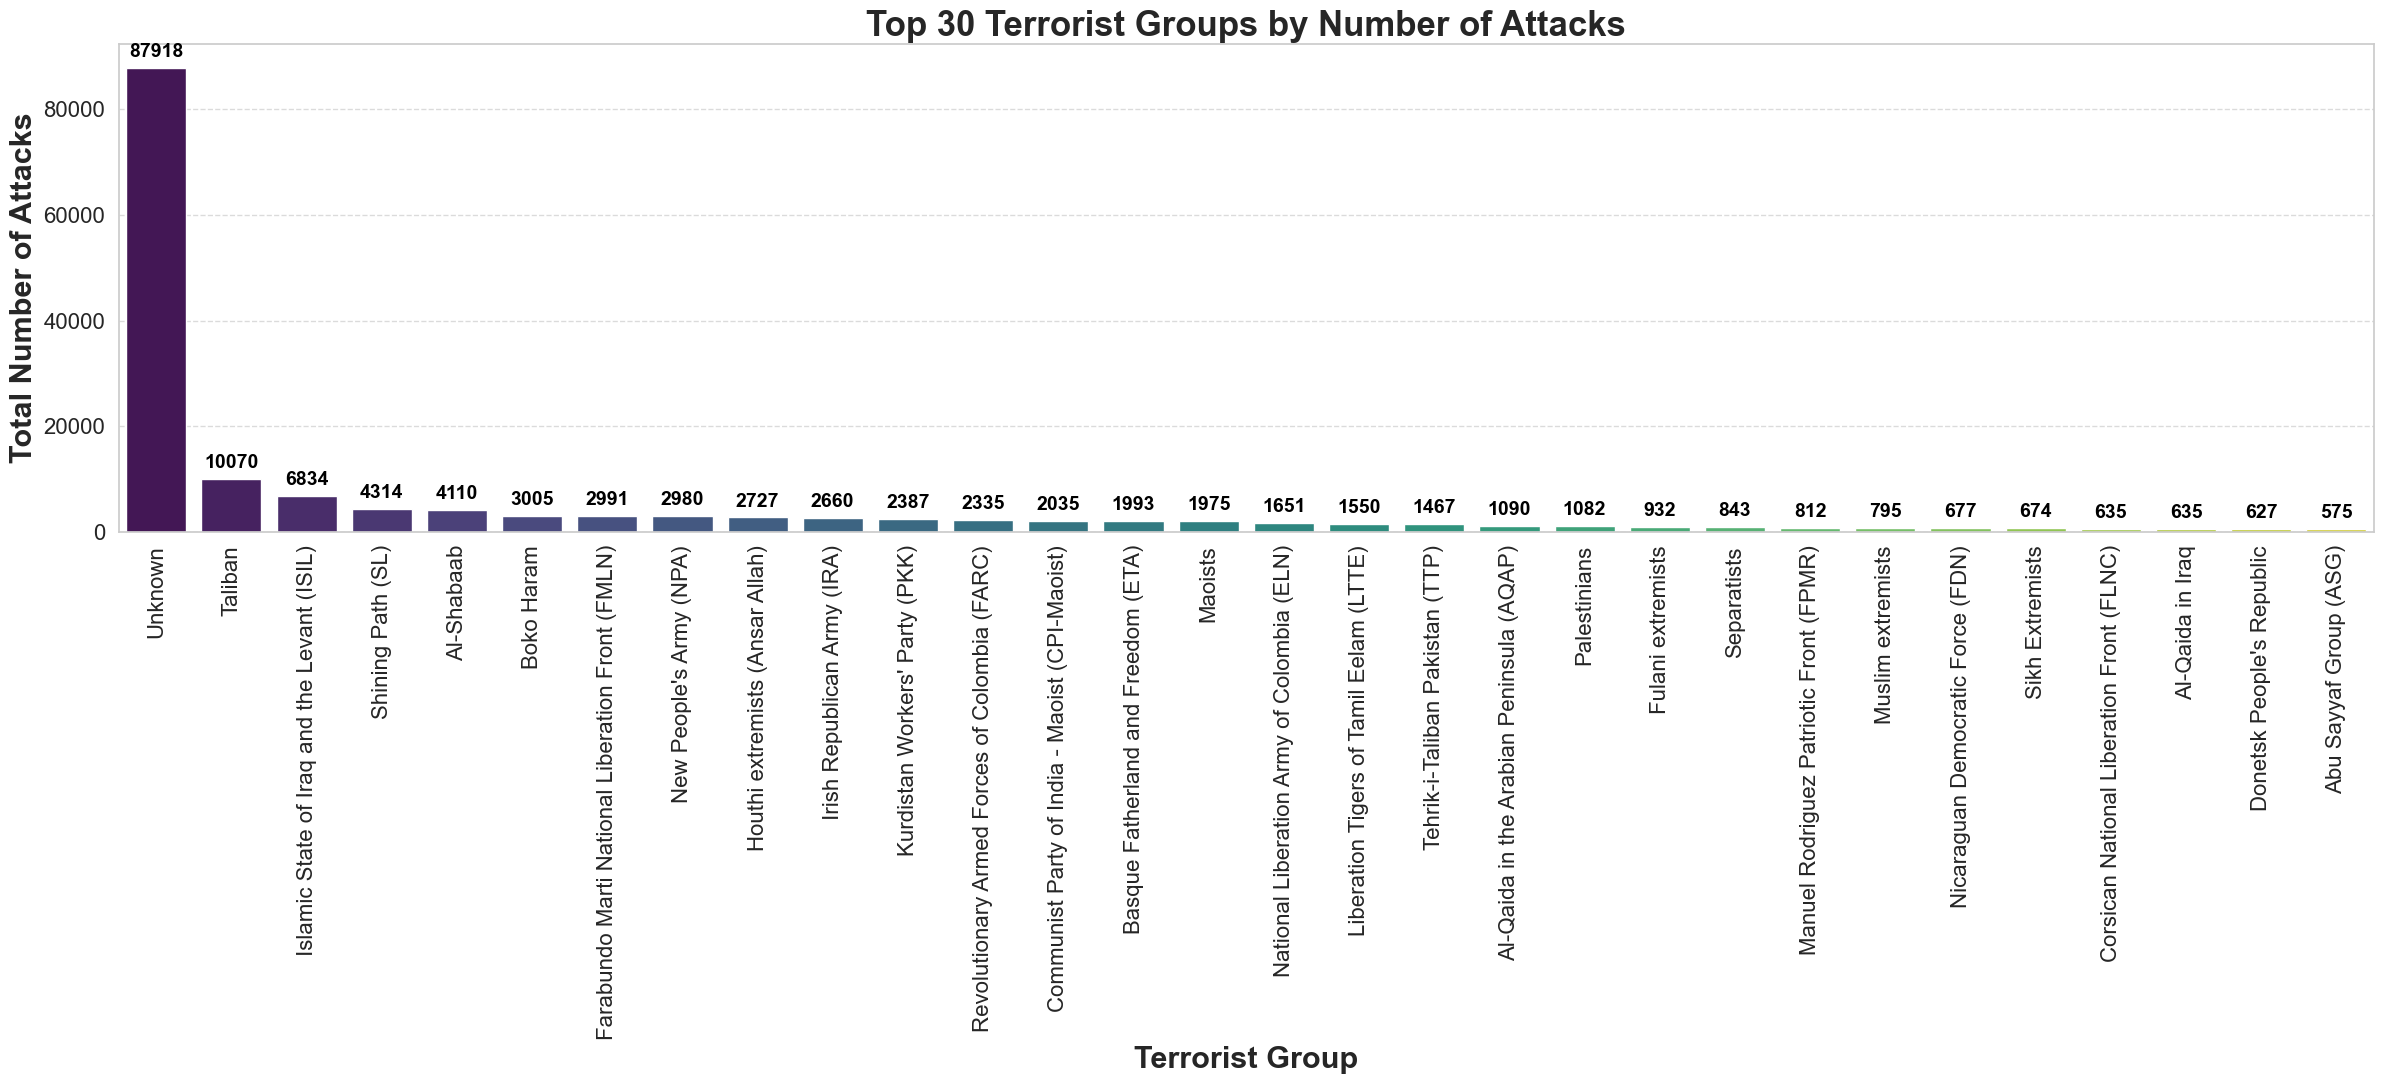

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and style
plt.figure(figsize=(24, 11))
sns.set_theme(style="whitegrid")

# Create a bar plot for the total number of attacks by terrorist groups
ax = sns.barplot(x='gname', y='Total_attacks', data=df_total_sucess_by_group.head(30), palette='viridis')

# Add titles and labels
plt.title('Top 30 Terrorist Groups by Number of Attacks', fontsize=25, weight='bold')
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Terrorist Group', fontsize=22, weight='bold')
plt.ylabel('Total Number of Attacks', fontsize=22, weight='bold')

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=14, weight='bold', color='black', 
                xytext=(0, 5),  # 5 points vertical offset
                textcoords='offset points')

# Improve gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


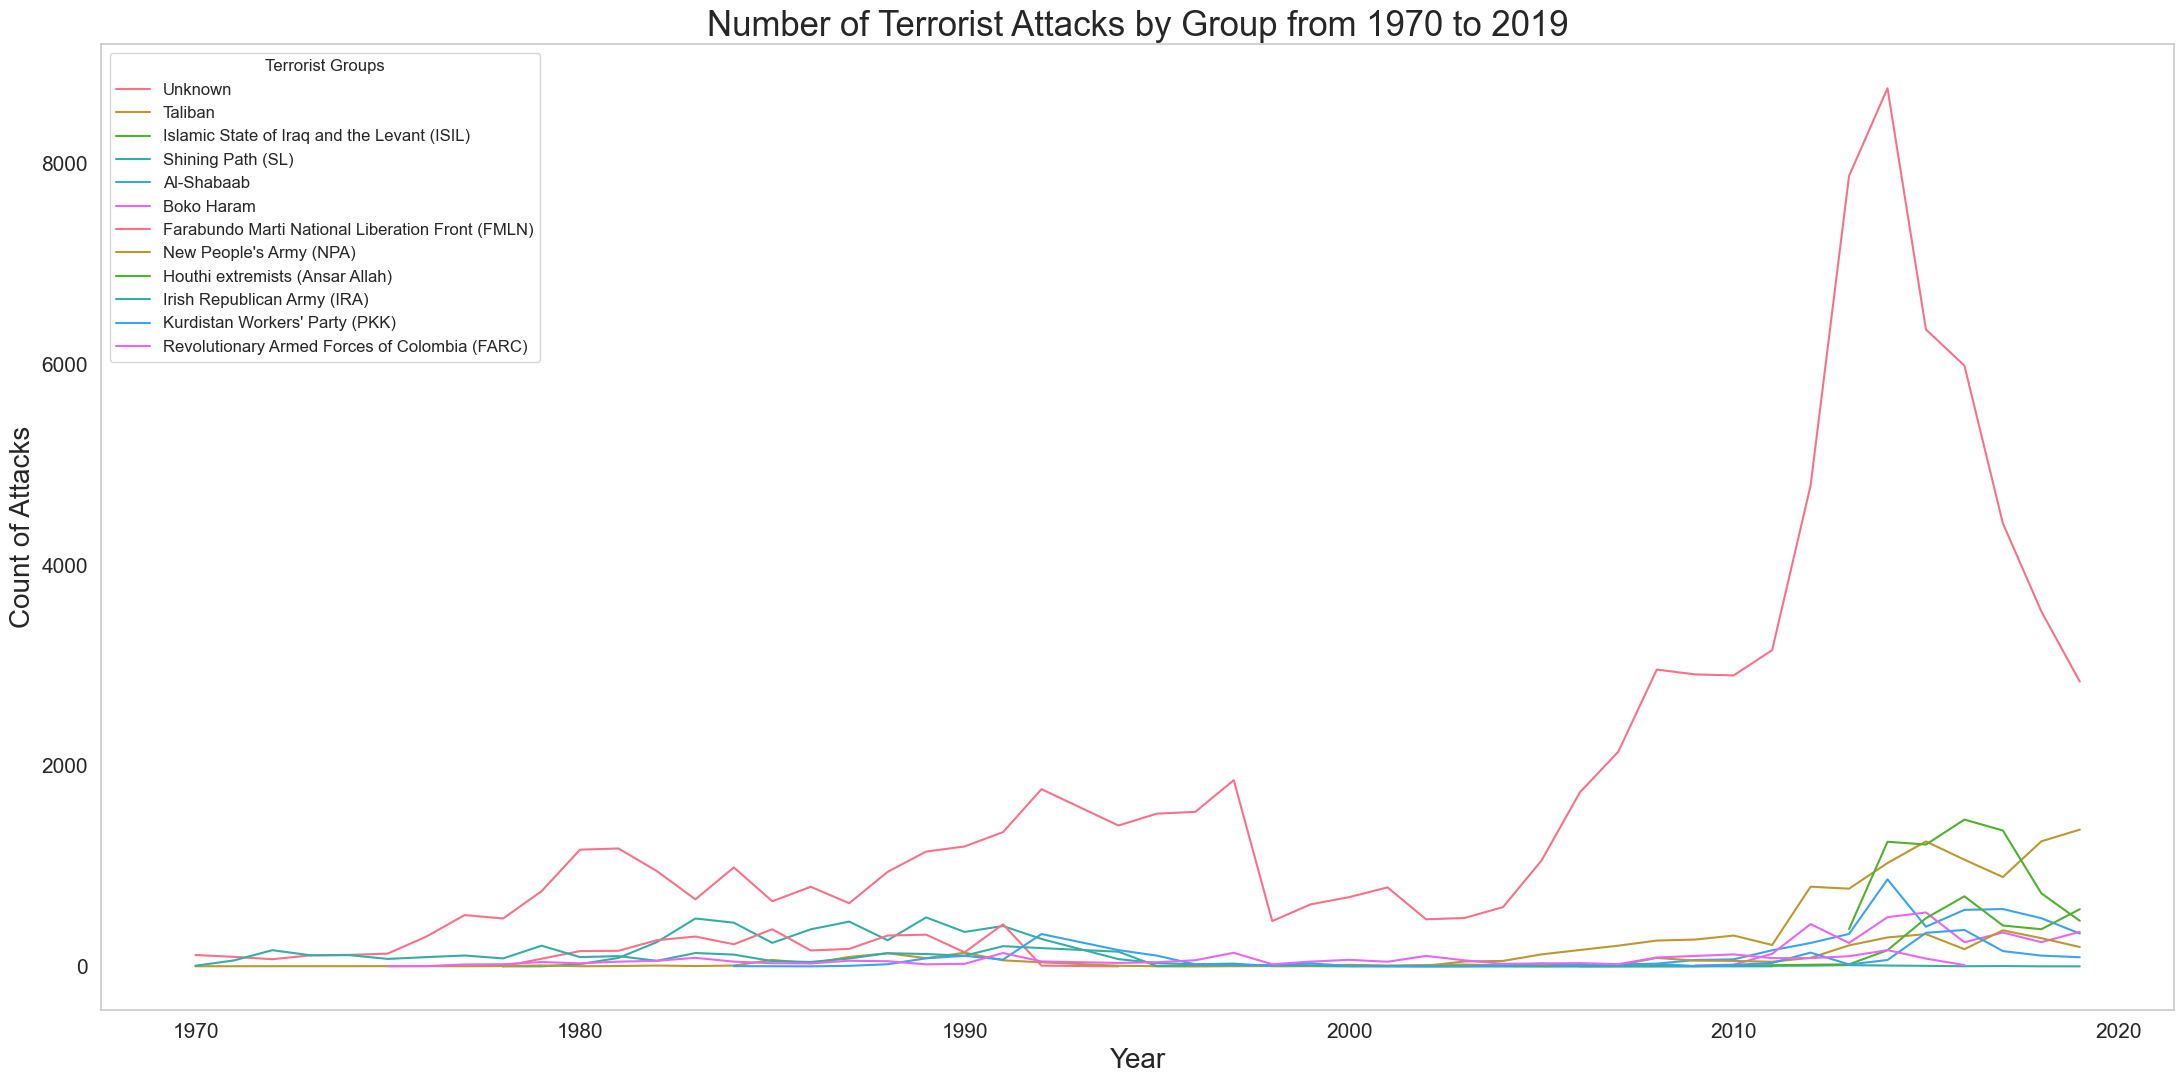

In [106]:
# Grouping the data by year and terrorist group
df_total_killed_year_by_group = df.groupby(['iyear', 'gname']).agg(Total_attacks=('nkill', 'count')).reset_index()

# Set up the figure
plt.figure(figsize=(22, 11))

# Create a line plot for each terrorist group
sns.set_palette("husl")  # You can change the palette for more aesthetic choices

for group in df['gname'].value_counts().head(12).index:  # Adjust the number of groups to display
    group_data = df_total_killed_year_by_group[df_total_killed_year_by_group['gname'] == group]
    sns.lineplot(data=group_data, x='iyear', y='Total_attacks', label=group)

# Add titles and labels
plt.title('Number of Terrorist Attacks by Group from 1970 to 2019', fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count of Attacks', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(title='Terrorist Groups', loc='upper left', fontsize=12)
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


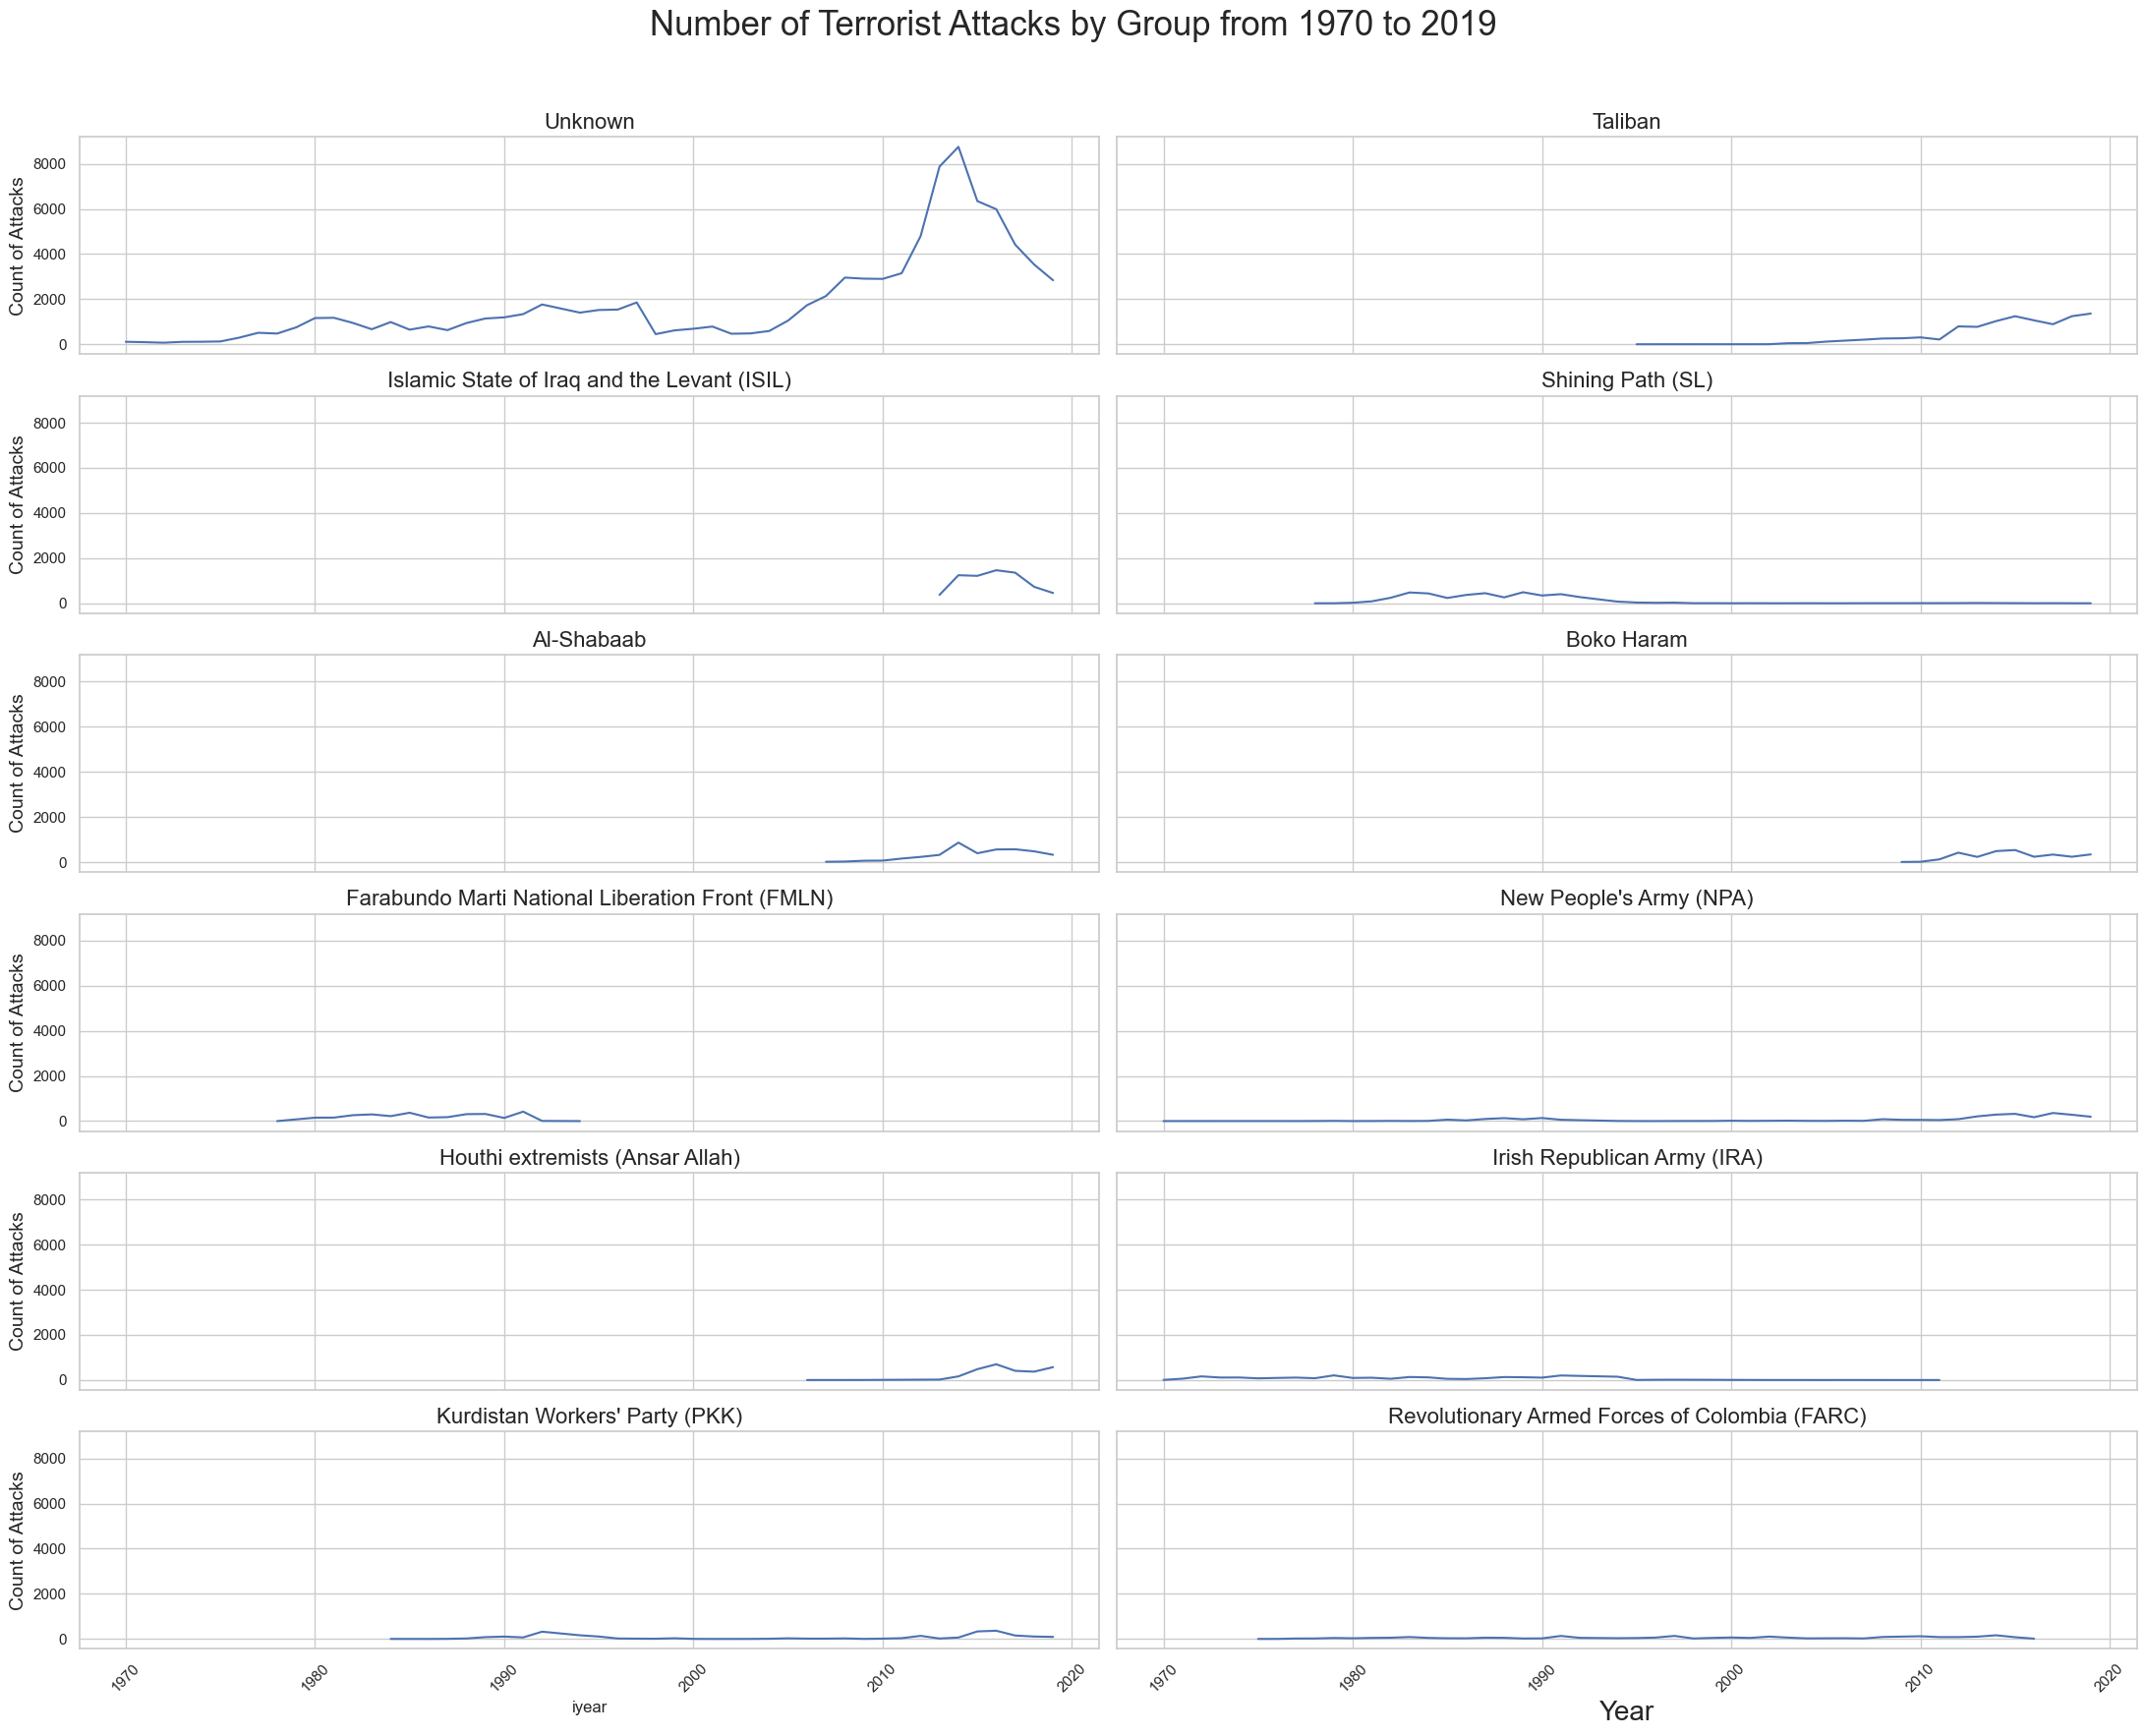

In [104]:
# Grouping the data by year and terrorist group
df_total_killed_year_by_group = df.groupby(['iyear', 'gname']).agg(Total_attacks=('nkill', 'count')).reset_index()

# Set up the figure with appropriate size
f, axes = plt.subplots(6, 2, figsize=(22, 18), sharex=True, sharey=True)

# List of unique terrorist groups to plot
groups_to_plot = df['gname'].value_counts().head(12).index  # Change number to select top N groups

# Create line plots for each group in subplots
for i, group in enumerate(groups_to_plot):
    ax = axes[i // 2, i % 2]  # Get the appropriate subplot
    sns.lineplot(data=df_total_killed_year_by_group[df_total_killed_year_by_group['gname'] == group], 
                 x='iyear', y='Total_attacks', ax=ax)
    ax.set_title(group, fontsize=16)
    ax.set_ylabel('Count of Attacks', fontsize=14)
    ax.tick_params(axis='x', rotation=45)

# Set common x-label and title for the overall plot
plt.xlabel('Year', fontsize=20)
plt.suptitle('Number of Terrorist Attacks by Group from 1970 to 2019', fontsize=25)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
plt.show()


In [101]:
#most of the attacks done were recognised by terrorist groups. 
#With regards of attacks recognized, Taliban, ISIL, SL, Al-Shabaab and Boko -Haram, are the top 5 most dangerous terrorist group.
# and 4 of them are Islamic fundamentalists groups.

In [102]:
df_total_success = df.groupby(['success']).agg(Total_attacks=('nkill', 'count'),Total_killed=('nkill', 'sum'),Total_wound=('nwound', 'sum')).sort_values(by="Total_attacks", ascending=False).reset_index()
df_total_success

success  Total_attacks  Total_killed  Total_wound
0        1         173702        444645       599882
1        0          22853         17683        16647

C:\Users\dev17\AppData\Local\Temp\ipykernel_32552\442960107.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




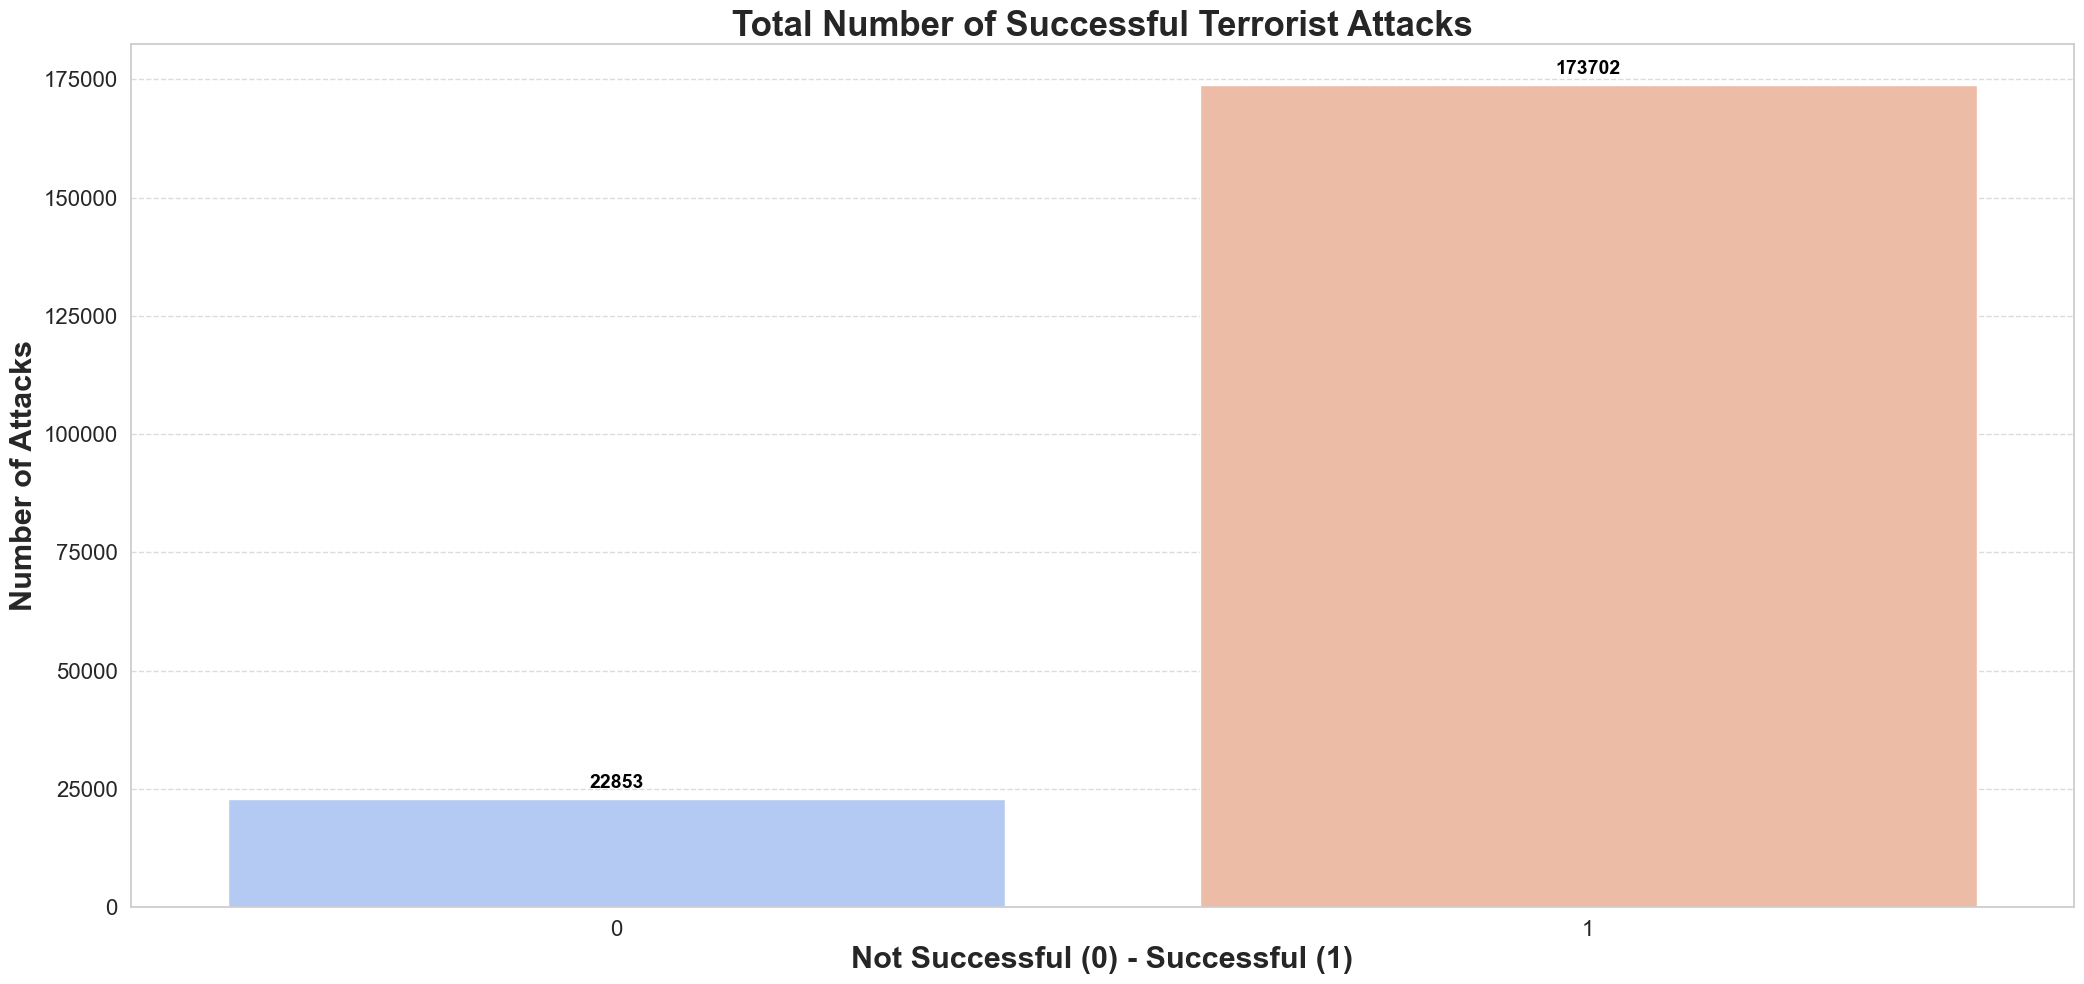

In [103]:
plt.figure(figsize=(21, 10))

# Set a more appealing color palette
palette = sns.color_palette("coolwarm", n_colors=len(df_total_success['success'].unique()))

# Create the bar plot
ax = sns.barplot(x='success', y='Total_attacks', data=df_total_success, palette=palette)

# Add titles and labels
plt.title('Total Number of Successful Terrorist Attacks', fontsize=25, weight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Not Successful (0) - Successful (1)", fontsize=22, weight='bold') 
plt.ylabel('Number of Attacks', fontsize=22, weight='bold')

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=14, weight='bold', color='black', 
                xytext=(0, 5),  # 5 points vertical offset
                textcoords='offset points')

# Improve gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [88]:
#Machine Learning: Forecasting Attack Success
#The aim of this analysis is to determine the likelihood of a terrorist attack being successful. 
#To accomplish this, we will explore a range of classification techniques, such as Random Forest and Decision Tree classifiers, 
#ultimately selecting the model that demonstrates the best performance accuracy for our needs.

#Defining Success: The success of a terrorist attack is evaluated based on its direct consequences, rather than the overarching ambitions of the attackers.
#For example, an explosive device that detonates within a building is classified as successful, regardless of whether it causes complete structural collapse or prompts government action. 
#The criteria for a successful attack can differ based on the method employed. The fundamental issue is whether the attack type was executed as planned. 
#In cases where multiple attack types are involved, the incident is considered successful if at least one of those types achieves its objective, except for assassination attempts, which are deemed successful only if the targeted individual is killed.


In [89]:
# Splitting the dataset into features (X) and target variable (Y)
dfnew = df[["imonth", "iday", "success", "attacktype1", "targtype1", "natlty1", "weaptype1", 
             "nkill", "nwound", "region", "latitude", "longitude", "specificity", 
             "vicinity", "extended", "crit1", "suicide"]]

# The 'nkill' variable will be replaced with a new variable called 'Lab_kill', which indicates 
# whether there were fatalities (1) or not (0).
# Similarly, the 'nwound' variable will be replaced with 'Lab_wound', which indicates 
# if there were any injuries (1) or not (0).

dfnew['lab_kill'] = dfnew['nkill'].apply(lambda x: 1 if x > 0 else 0)
dfnew['lab_wound'] = dfnew['nwound'].apply(lambda x: 1 if x > 0 else 0)

dfnew


imonth  iday  success  attacktype1  targtype1  natlty1  weaptype1  nkill  nwound  region   latitude   longitude  specificity  vicinity  extended  crit1  suicide  lab_kill  lab_wound
0            7     2        1            1         14     58.0         13      1       0       2  18.456792  -69.951164          1.0         0         0      1        0         1          0
1            1    11        1            6          7     21.0         13      0       0       1  19.371887  -99.086624          1.0         0         0      1        0         0          0
2            1    11        1            1         10    217.0         13      1       0       5  15.478598  120.599741          4.0         0         0      1        0         1          0
3            1    11        1            3          7    217.0          6      2       3       8  37.997490   23.762728          1.0         0         0      1        0         1          1
4            1    11        1            7          7    217.0          8      2       3       4  33.580412  130.396361          1.0         0         0      1        0         1          1
...        ...   ...      ...          ...        ...      ...        ...    ...     ...     ...        ...         ...          ...       ...       ...    ...      ...       ...        ...
201178      12    31        1            3         14     95.0          6      0       0      10  33.303567   44.371771          1.0         0         0      1        0         0          0
201179      12    31        1            9          3    195.0         13      2       1      11  13.440886   22.441728          1.0         0         0      1        0         1          1
201180      12    31        1            2          2    195.0          5      2       0      11  13.440886   22.441728          1.0         0         0      1        0         1          0
201181      12    31        1            3         14     92.0          6      0       1       6  33.812790   74.097730          1.0         0         0      1        0         0          1
201182      12    31        1            7          2     89.0          8      0       0       4  22.340073  114.138494          1.0         0         0      1        0         0          0

[196555 rows x 19 columns]

In [90]:
#We remove the variable 'iyear' from the dataset because historical years cannot be repeated and, thus, do not influence the predictions. 
#We also eliminate the 'country' variable while retaining 'longitude' and 'latitude' for geographical context. 
#Additionally, we replace the 'nkill' variable with 'lab_kill', assigning a value of 0 when there are no fatalities and a value of 1 when there are casualties.

In [91]:
dfnew = dfnew[["imonth","iday", "success","attacktype1","targtype1","natlty1","weaptype1","lab_kill","lab_wound","region","latitude","longitude","specificity","vicinity","extended","crit1","suicide"]]
dfnew=dfnew.dropna()

In [92]:
X = dfnew.drop(["success"], axis = 1, inplace = False)
X

imonth  iday  attacktype1  targtype1  natlty1  weaptype1  lab_kill  lab_wound  region   latitude   longitude  specificity  vicinity  extended  crit1  suicide
0            7     2            1         14     58.0         13         1          0       2  18.456792  -69.951164          1.0         0         0      1        0
1            1    11            6          7     21.0         13         0          0       1  19.371887  -99.086624          1.0         0         0      1        0
2            1    11            1         10    217.0         13         1          0       5  15.478598  120.599741          4.0         0         0      1        0
3            1    11            3          7    217.0          6         1          1       8  37.997490   23.762728          1.0         0         0      1        0
4            1    11            7          7    217.0          8         1          1       4  33.580412  130.396361          1.0         0         0      1        0
...        ...   ...          ...        ...      ...        ...       ...        ...     ...        ...         ...          ...       ...       ...    ...      ...
201178      12    31            3         14     95.0          6         0          0      10  33.303567   44.371771          1.0         0         0      1        0
201179      12    31            9          3    195.0         13         1          1      11  13.440886   22.441728          1.0         0         0      1        0
201180      12    31            2          2    195.0          5         1          0      11  13.440886   22.441728          1.0         0         0      1        0
201181      12    31            3         14     92.0          6         0          1       6  33.812790   74.097730          1.0         0         0      1        0
201182      12    31            7          2     89.0          8         0          0       4  22.340073  114.138494          1.0         0         0      1        0

[194750 rows x 16 columns]

In [93]:
Y = dfnew['success']
Y

0         1
1         1
2         1
3         1
4         1
         ..
201178    1
201179    1
201180    1
201181    1
201182    1
Name: success, Length: 194750, dtype: int64

In [94]:
#Analysis of feature importance of tree based classifier

[0.09475721 0.12301674 0.14860868 0.1157292  0.0535524  0.0328126
 0.07015158 0.03534134 0.027249   0.12602148 0.12657329 0.01766478
 0.00787409 0.00601754 0.00176964 0.01286043]


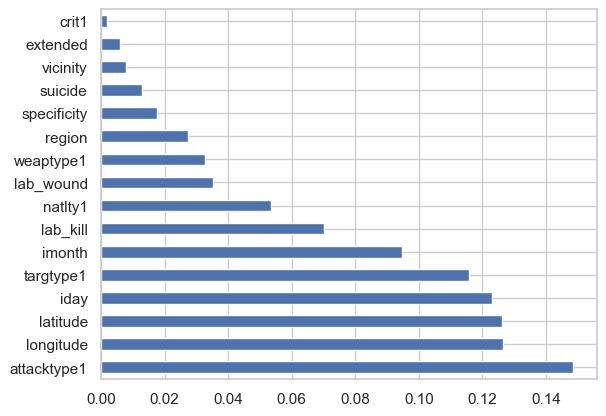

In [95]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

In [107]:
#The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. 
#It is also known as the Gini importance.
#In this analysis, we can see that the variables crit1, extended vicinity and suicide have few importance, but we will keep it in our model

In [108]:
#Feature Correlation analysis
#We will proceed analysing the correlation between the features

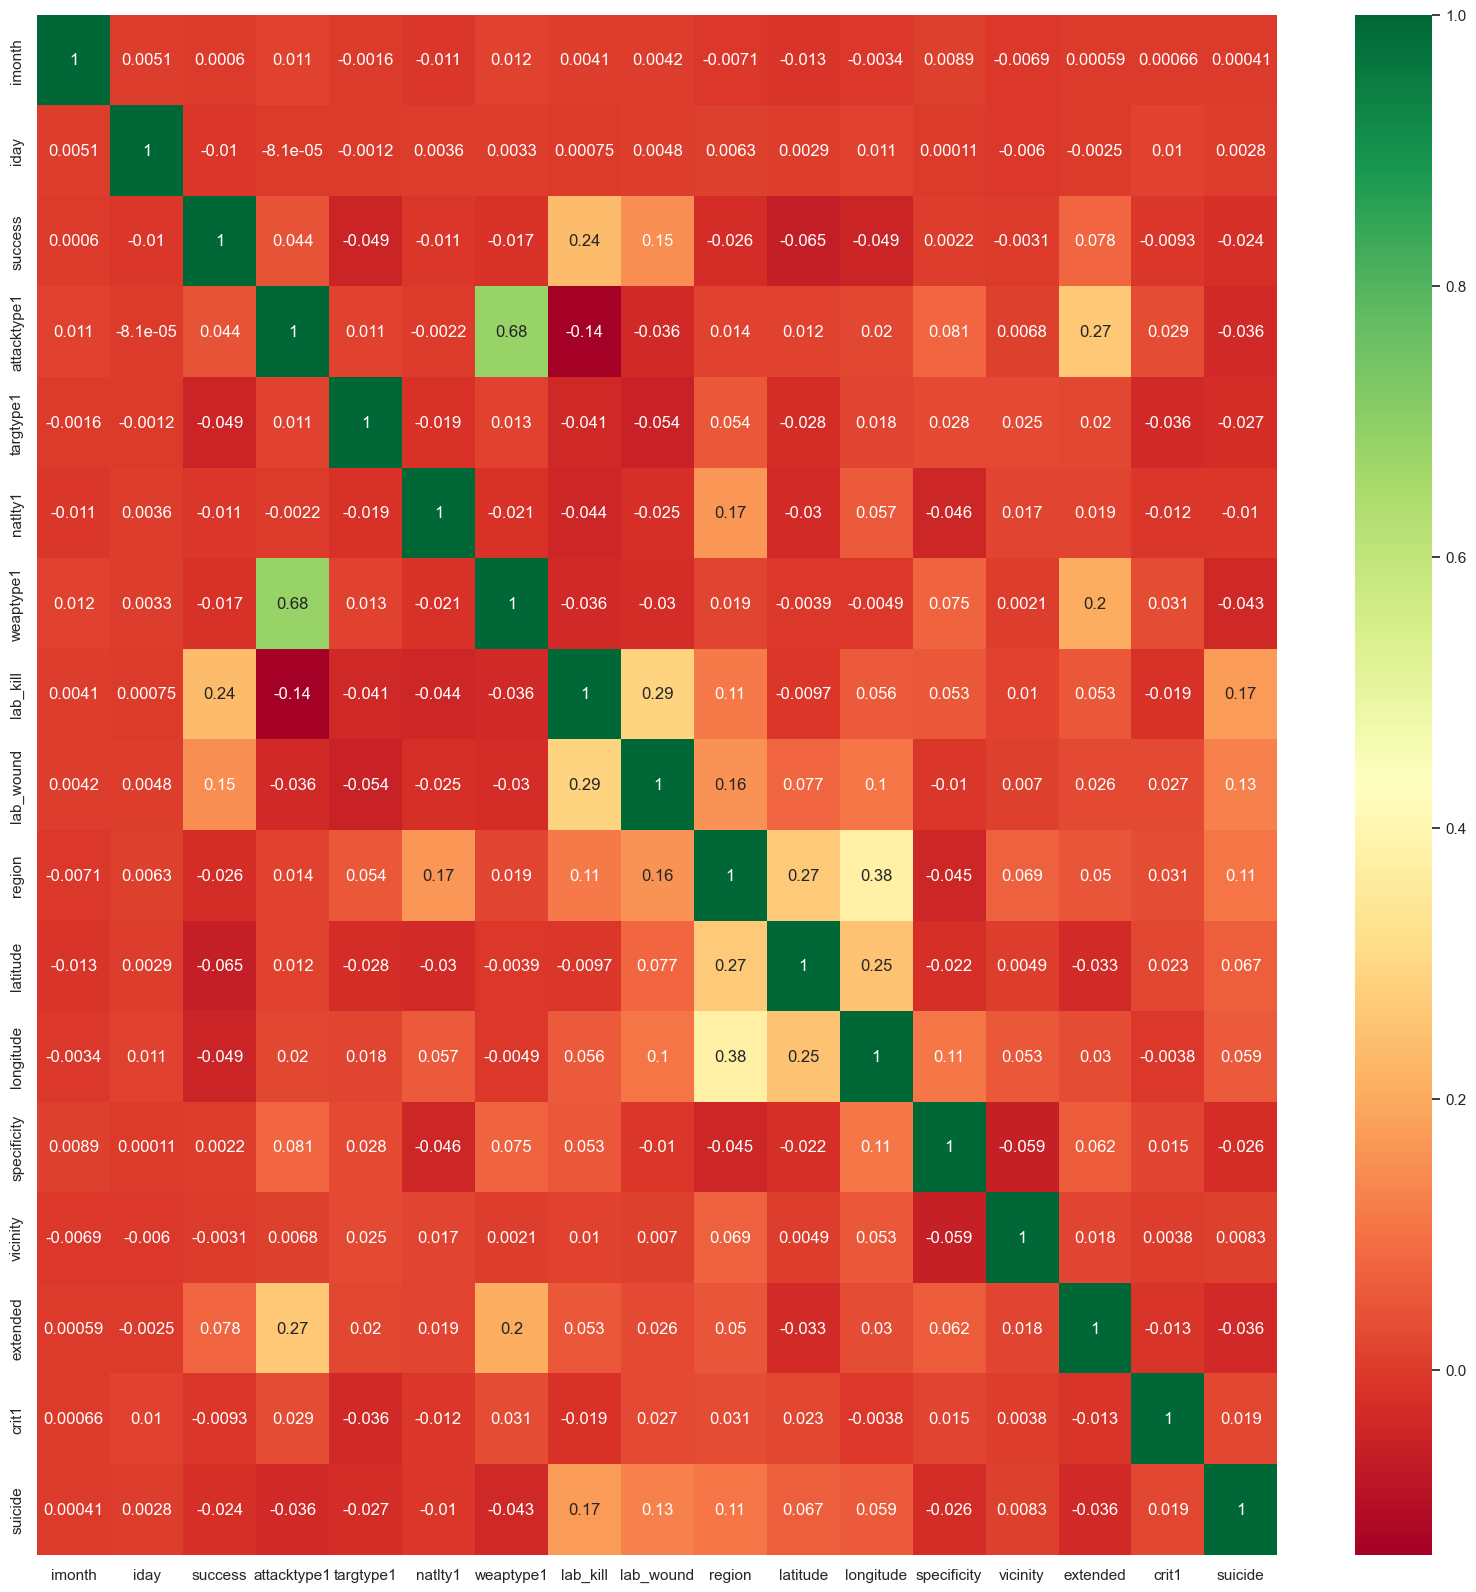

In [109]:
data = dfnew
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [110]:
#We can see, that the features (weaptype1) weapon type and (attacktype1) type of attack, are the highest correlated, 
#followed by region and longitude, and region and latitude, and (lab_kill) if there was people killed with success. 
#We will keep all the variables.

In [112]:
#Splitting the dataset into training and test set

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)
#Training the Random Forest Clasificaton model on the Training Set

In [113]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [114]:
#Predicting the Test set results

y_pred = classifier.predict(X_test)
y_pred


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [115]:
final_model_predictions = pd.DataFrame({'Actual':y_test, 'Predictions':y_pred}).reset_index()
final_model_predictions= final_model_predictions.iloc[:,1:3]
final_model_predictions

Actual  Predictions
0           1            1
1           1            1
2           1            1
3           1            1
4           1            1
...       ...          ...
58420       1            1
58421       1            1
58422       1            1
58423       1            1
58424       1            1

[58425 rows x 2 columns]

In [116]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix (y_test, y_pred)
cm

array([[ 3801,  2819],
       [ 1494, 50311]], dtype=int64)

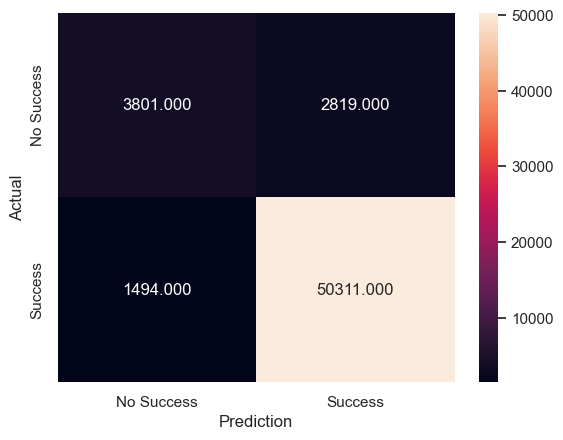

In [117]:
import matplotlib.pylab as plt
import seaborn as sn
from sklearn import tree , metrics, preprocessing

def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted )
    sn.heatmap(cm, annot=True,  fmt='.3f', xticklabels = ["No Success", "Success"] , yticklabels = ["No Success", "Success"] )
    plt.ylabel('Actual')
    plt.xlabel('Prediction')
    plt.show()

draw_cm( final_model_predictions.Actual, final_model_predictions.Predictions )   # correct 0 is sensitivity and correct is specificity

In [118]:
accuracy_score(y_test,y_pred)

0.9261788617886179

In [127]:
'''Conclusion
The Global terrorism is a very important problem, according to our analysis since 2004 the number of attacks have been increasing exponentially, being 2014 the most dangerous year, with 16794 attacks, 46308 people killed, and 46496 people wound.

From 2009 to 2019, the Total number of attacks was 110409, total number of people killed 262359 and the total number of people wound 330483, comparing this figures with the period from 1970 till 2008: the Total number of attacks was 86146, total number of people killed 199969 and total number of people wound 286046. This figures shows clearly the current situation with regards to global terrorism, being a problem that has been increased dramatically.

The Regions that currently have the worst trends, are Middle East & North Africa, South Asia and Sub-Saharan Africa. The preferred method used by terrorist is Bombing and explosiong, due to the amount of people that could be killed and wound in the attack, followed by Armed assault. Both methods were the most used during all the period analysed.

With regards to the prediction using a classification algorithm, in this case random forest classifier, the accuracy is of 0.926, and is the one that we will choose for our app in streamlit.

With regards to the app, we will be able to see in an user friendly way, the most important information with regards to terrorist attacks choosing by country and period of time.'''

'Conclusion\nThe Global terrorism is a very important problem, according to our analysis since 2004 the number of attacks have been increasing exponentially, being 2014 the most dangerous year, with 16794 attacks, 46308 people killed, and 46496 people wound.\n\nFrom 2009 to 2019, the Total number of attacks was 110409, total number of people killed 262359 and the total number of people wound 330483, comparing this figures with the period from 1970 till 2008: the Total number of attacks was 86146, total number of people killed 199969 and total number of people wound 286046. This figures shows clearly the current situation with regards to global terrorism, being a problem that has been increased dramatically.\n\nThe Regions that currently have the worst trends, are Middle East & North Africa, South Asia and Sub-Saharan Africa. The preferred method used by terrorist is Bombing and explosiong, due to the amount of people that could be killed and wound in the attack, followed by Armed assau